# Credit Card Fraud Detection

## Business Understanding:

<b>Target Domain/Sector:</b> Banking

#### Problem Statement Pretext:
1. For many banks, retaining their high-profitable customers is the number one business goal. 
2. Banking fraud, however, poses a significant threat to this goal for different banks. 
3. In terms of incurring substantial financial losses, losing trust and credibility, banking fraud is an issue concerning both banks and customers alike.

#### Why Apply Machine Learning:
1. In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. 
2. Machine learning helps these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

#### Define Credit Card Fraud:
Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways:

1. Manipulation/alteration of genuine cards
2. Creation of counterfeit cards
3. Stealing/loss of credit cards
4. Fraudulent telemarketing

## Project Objective:

1. This project aims to predict fraudulent credit card transactions with the help of machine learning models.
2. In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 
3. We will analyse customer-level data and handle class imbalances present in the data set, along with performing model selection and hyperparameter tuning.

## Project Checkpoints:

1. Data Understanding
2. Data Preparation
3. Model Building and Selection
4. Model Evaluation
5. Conclusion

## 1. Data Understanding:

<b>Steps Involved:</b>
1. Dataset observation
2. Understanding Class Imbalance
3. Exploratory Data Analysis

### Data Observation
Let's import the data and have a look at the same to derive some insights:

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import sklearn
from sklearn import metrics
from sklearn import preprocessing
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the csv file
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Inference:

* The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. 
* There is a total of 2,84,807 transactions in the data set. 
* There are no null values and hence there is no need for data cleaning/imputation. 
* The data type of the columns also appear to be correct and hence there is no need to perform any changes there as well.
* The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. 
* The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. 

* The feature 'amount' is the transaction amount. 
* The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

### Understanding Class Imbalance

Let's take a look at the class distribution to understand if there is a class imbalance or not

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Since we know that apart from Time and Amount all other features are principle components. Hence let's look at the spread of specifically these 2 features against classes given

In [7]:
Amount_Spread = df.groupby('Class').aggregate({'Amount':'mean'}).rename(columns = {'Amount':'Amount_Mean'})
Amount_Spread['Amount_Min'] = df.groupby('Class').aggregate({'Amount':'min'}).Amount
Amount_Spread['Amount_Max'] = df.groupby('Class').aggregate({'Amount':'max'}).Amount
Amount_Spread

,Amount_Mean,Amount_Min,Amount_Max
Class,,,
0,88.291022,0.0,25691.16
1,122.211321,0.0,2125.87


In [8]:
Time_Spread = df.groupby('Class').aggregate({'Time':'mean'}).rename(columns = {'Time':'Time_Mean'})
Time_Spread['Time_Min'] = df.groupby('Class').aggregate({'Time':'min'}).Time
Time_Spread['Time_Max'] = df.groupby('Class').aggregate({'Time':'max'}).Time
Time_Spread

,Time_Mean,Time_Min,Time_Max
Class,,,
0,94838.202258,0.0,172792.0
1,80746.806911,406.0,170348.0


Clearly there is an imbalace in the distribution of Amount between the 2 classes. Let's also look at the count distribution between the two classes to conclude the class imbalance

In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
print("Percentage of Fraudulent transactions: {:.3f}".format((len(df[df.Class == 1])/len(df))*100))

Percentage of Fraudulent transactions: 0.173


#### Inference:
Clearly there is a class imbalance, out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly imbalanced, with the positive class (frauds) accounting for 0.173% of the total transactions.  Let's try to visualize the same as part of EDA.

### Exploratory Data Analysis

<b>Create a plot for the number and percentage of fraudulent vs non-fraudulent transcations:</b>

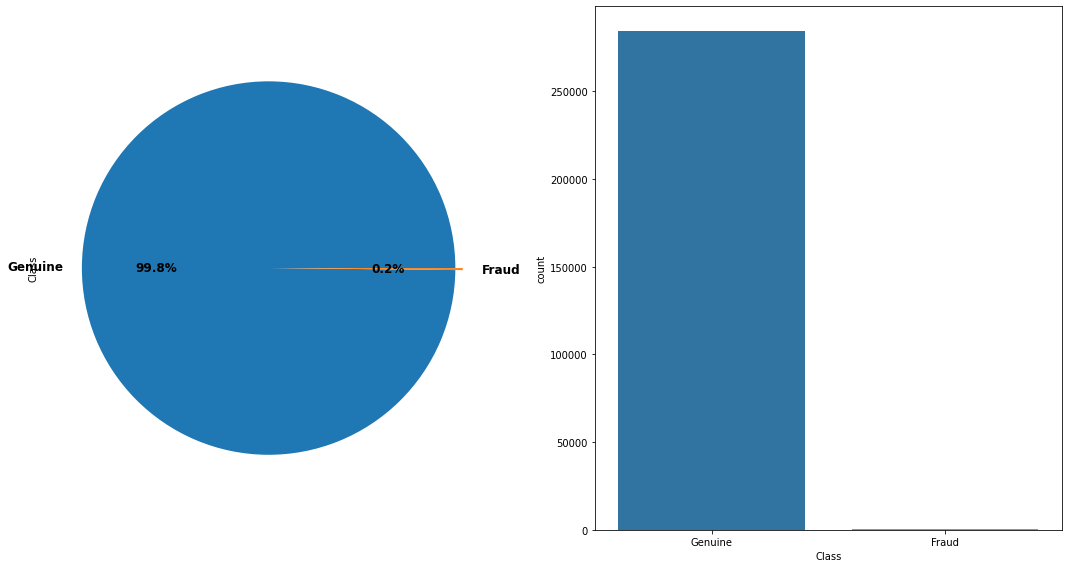

In [11]:
# Initialize the Figure Size
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
labels = ['Genuine','Fraud']
df.Class.value_counts().plot.pie(explode=(0.04,0),labels=labels,autopct='%1.1f%%',textprops={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'Black'})

plt.subplot(1,2,2)
sns.countplot(data=df,x='Class')
plt.xticks((0, 1), ('Genuine','Fraud'))

plt.tight_layout()    
plt.show()

<b>Create a scatter plot to observe the distribution of classes with time:</b>

Because the time is in seconds, let's convert it to hours to get a better understanding.

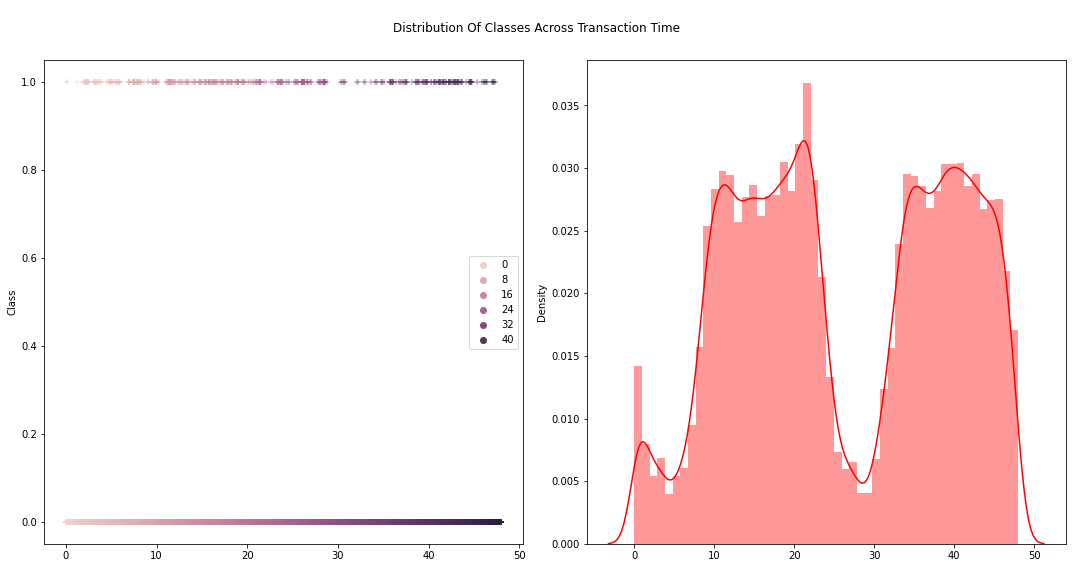

In [12]:
plt.figure(figsize=[15,8])
plt.suptitle("\nDistribution Of Classes Across Transaction Time\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

plt.subplot(1,2,1)
sns.scatterplot(x=df['Time'].values/(60*60),y='Class', data = df, hue=df['Time'].values/(60*60), marker='+')

plt.subplot(1,2,2)
sns.distplot(df['Time'].values/(60*60),color ='r')

plt.tight_layout()
plt.show()

#### Inerence:

Assuming that the data starts at 12:00 AM, it is evident from the distribution plot above, that transactions hit a minimum post mid-night and is maximum between 10:00 AM and 11:00 PM.

<b>Create a scatter plot to observe the distribution of classes with Amount:</b>

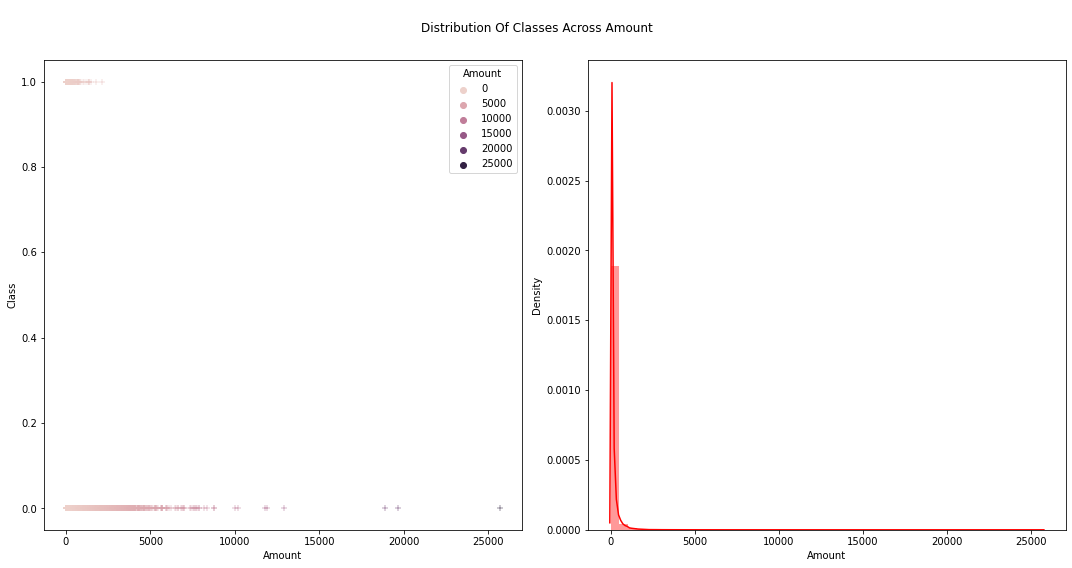

In [13]:
plt.figure(figsize=[15,8])
plt.suptitle("\nDistribution Of Classes Across Amount\n", fontdict={'fontsize': 20, 'fontweight' : 'bold', 'color' : 'Black'})

plt.subplot(1,2,1)
sns.scatterplot(x='Amount',y='Class', data = df, hue=df['Amount'], marker='+')

plt.subplot(1,2,2)
sns.distplot(df['Amount'],color ='r')

plt.tight_layout()
plt.show()

#### Inference:

It is evident that the amount of money is highly skewed towards right. the above plots do not give us a good sense of distribution of fraud and non-fraud/genuine against these features. Hence there is still scope for meaningful insight to be derived by dividing the data into fraud and genuine transactions and then plotting this data against amount and time. 

<b>Divide the data into Fraud and Genuine transactions and observe distribution:</b>

In [14]:
genuine = df[df.Class == 0]
fraud = df[df.Class == 1] 

<b>Against Time:</b>

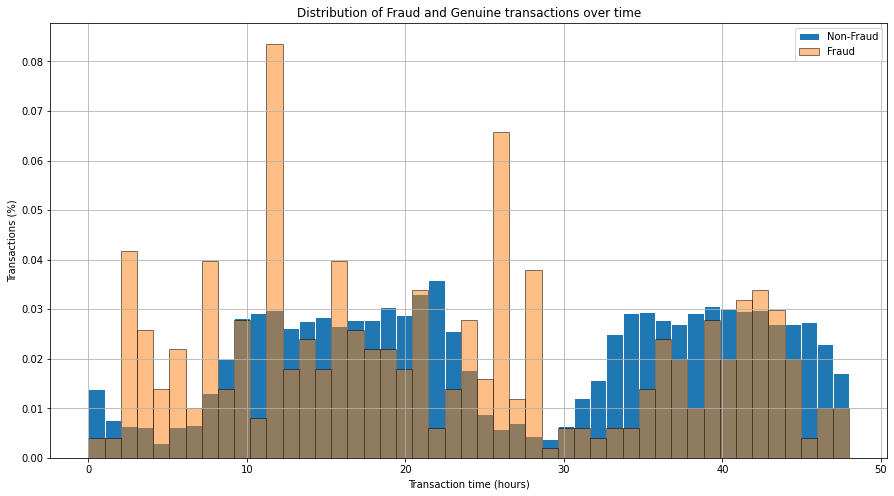

In [15]:
# Plot of transactions in 48 hours
plt.figure(figsize=[15,8])
plt.style.use('default')
plt.grid()
bins = np.linspace(0, 48, 48)
plt.hist((genuine['Time']/(60*60)), bins, alpha=1, density=True, label='Non-Fraud',edgecolor='white')
plt.hist((fraud['Time']/(60*60)), bins, alpha=0.5, density=True, label='Fraud',edgecolor='black')
plt.legend(loc='upper right')
plt.title("Distribution of Fraud and Genuine transactions over time")
plt.xlabel("Transaction time (hours)")
plt.ylabel("Transactions (%)")
plt.show()

#### Inference:
Higher rate of fraud calls occur between 10:00 AM and 12 Noon. There is also higher rates of fraud calls in the midnight when clearly the number of genuine card transactions are very less.

<b>Against Amount:</b>

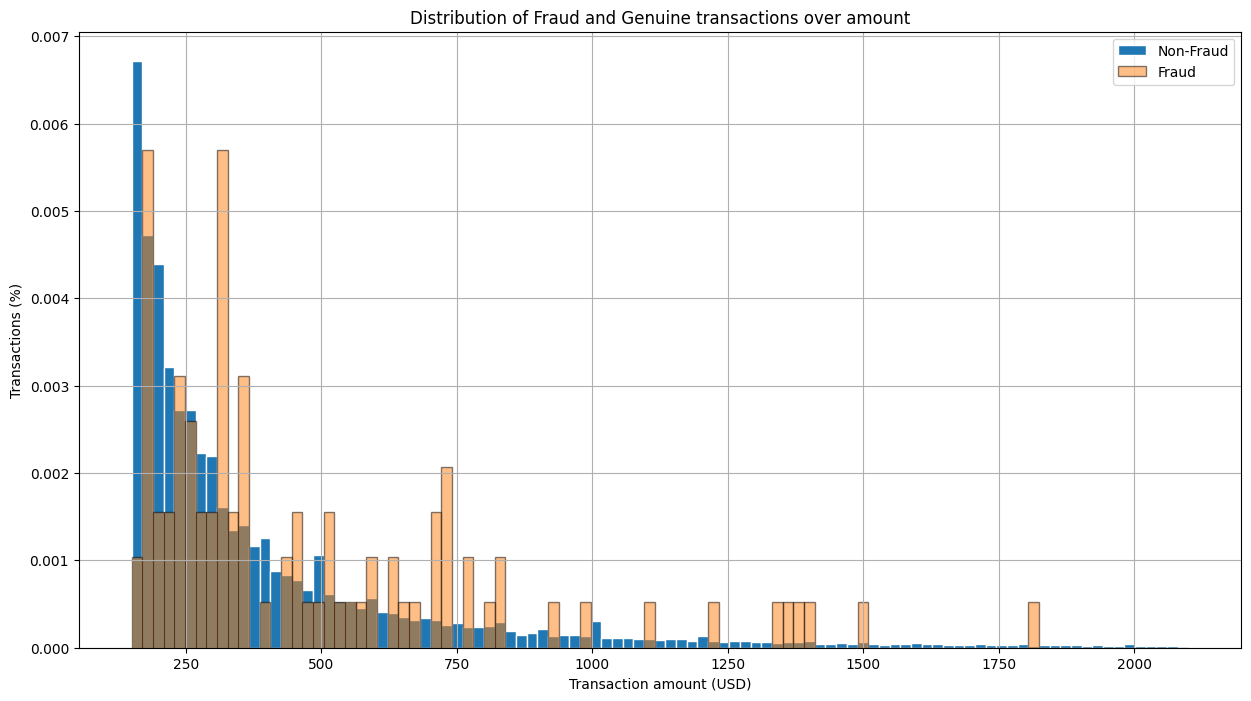

In [16]:
# Plot of transactions against amount
plt.figure(figsize=[15,8])
plt.style.use('default')
plt.grid()
bins = np.linspace(150, 2100, 100)
plt.hist(genuine['Amount'], bins, alpha=1, density=True, label='Non-Fraud',edgecolor='white')
plt.hist(fraud['Amount'], bins, alpha=0.5, density=True, label='Fraud',edgecolor='black')
plt.legend(loc='upper right')
plt.title("Distribution of Fraud and Genuine transactions over amount")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Transactions (%)")
plt.show()

#### Inference:

More number of frauds are noticed for smaller amounts, i.e., amounts smaller than 500 USD.

<b>Perform univariate analysis to view the trend across all features:</b>

<Figure size 640x480 with 0 Axes>

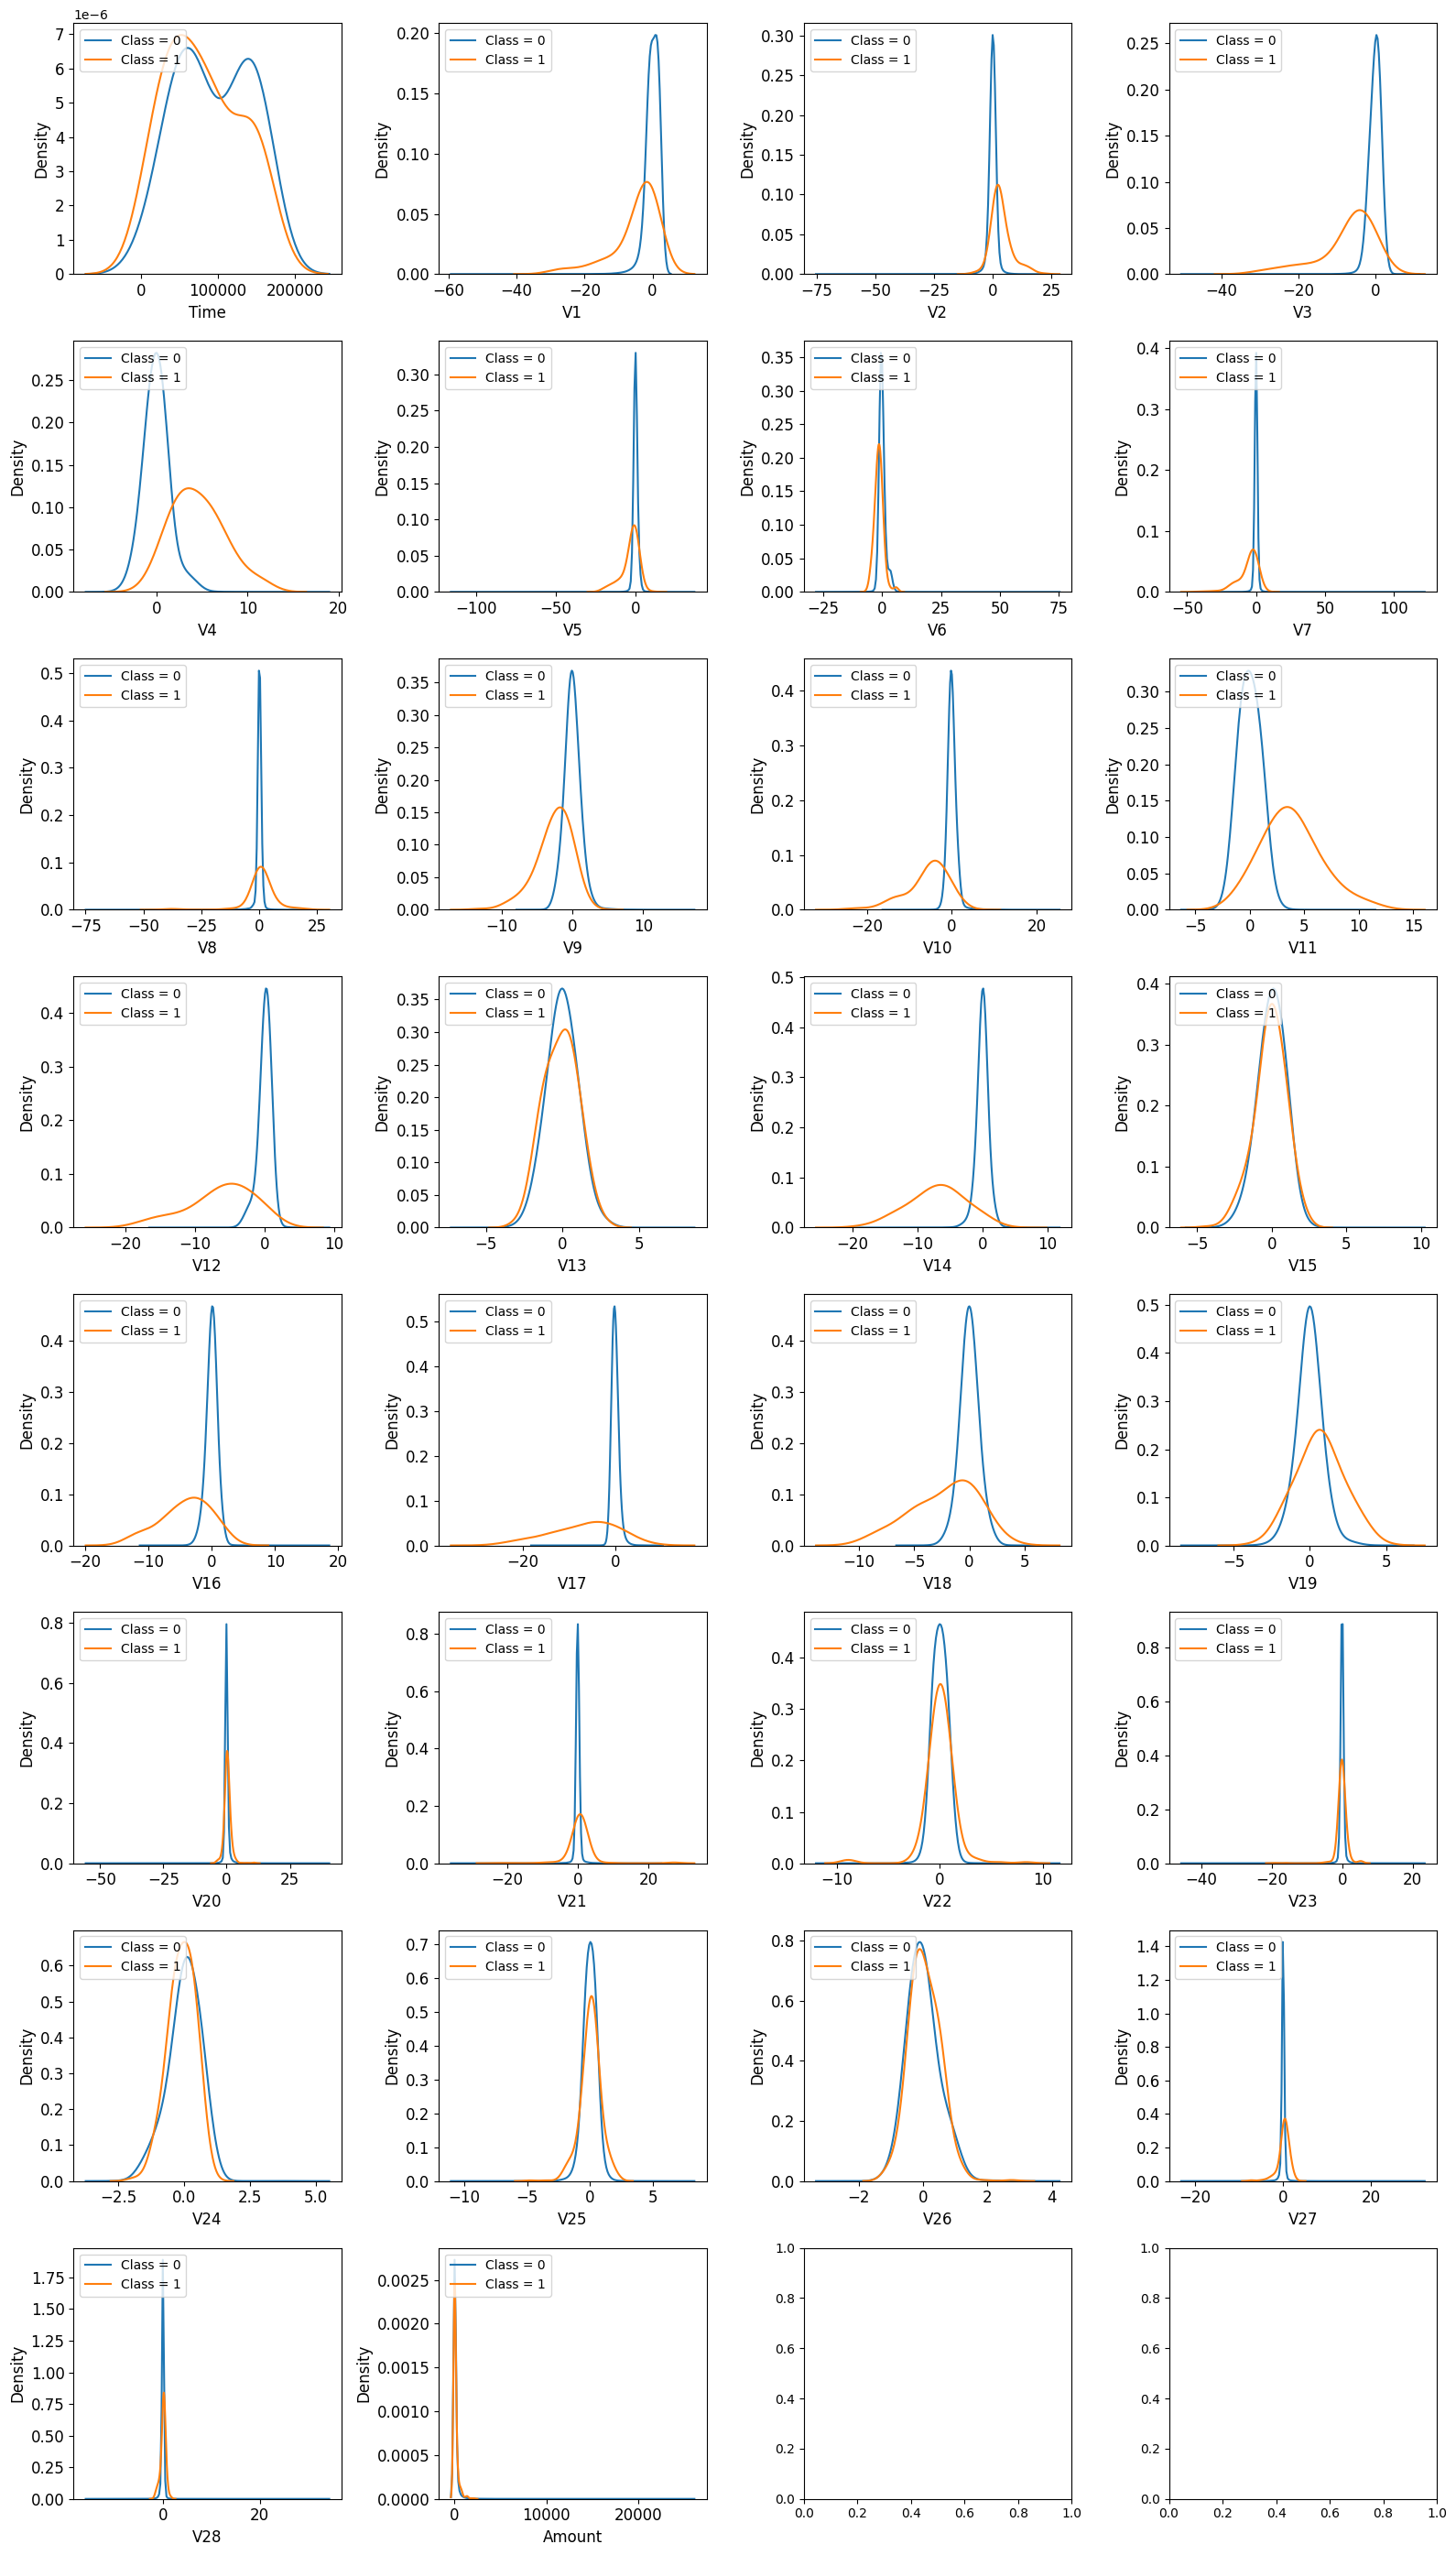

In [17]:
cols = df.columns.drop('Class')

i = 0

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in cols:
    if i <len(cols):
      i += 1
      plt.subplot(8,4,i)
      sns.kdeplot(genuine[feature], bw=0.5,label="Class = 0")
      sns.kdeplot(fraud[feature], bw=0.5,label="Class = 1")
      plt.xlabel(feature, fontsize=12)
      plt.ylabel('Density', fontsize=12)
      locs, labels = plt.xticks()
      plt.legend(loc='upper left')
      plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show();

#### Inference:
Most of the features are gaussian in nature as they have underwent Principal Component Analysis but there is high amount of skewness that is evident from the above graphs.

Apart from the fact that most transactions happen during day/evening time, there is no special insight provided by the feature 'Time'. Let's go ahead and drop the same.

<b>Drop unnecessary feature</b>

In [18]:
df_clean = df.drop(['Time'],axis = 1)

df_clean.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

#### Inference:

It is evident from above that df_clean now contains clean dataset without unnecessary column. With this we come to an end of checkpoint 1. Let's move towards checkpoint 2 - Data Preparation.

## 2. Data Preparation

<b>Steps Involved:</b>
1. Division of dataframe into train and test data
2. Transformation of Train and Test Dataframe: Scaling the principle components using power transformation
3. Dividing the train dataframe into X_train (DF of all the predictor variables) and y_train (Target variable) and perform similar operation on test dataframe

### Division of dataset into train and test data:

In [19]:
# import required libraries
from sklearn.model_selection import train_test_split

Divide dataset ensuring that 'Class' gets equally distrubuted. hence using 'stratify' feature of the train_test_split class

In [20]:
#Split 75% of the original dataframe into train dataframe and the remaining 25% into test dataframe
np.random.seed(0)
# Divide dataset ensuring that 'Class' gets equally distrubuted. hence using 'stratify' feature of the train_test_split class
df_train,df_test = train_test_split(df_clean,train_size=0.75,random_state=100,stratify = df_clean.Class)
print(df_train.shape)
print(df_test.shape)

(213605, 30)
(71202, 30)


Now that we have separate train and test dataframes, let's move towards the next step of data preparation which is perform transformation as we saw previously during EDA that the density of data even though guassian to a certain extent, it is skewed. Hence in order to bring down the skewness, we will now be performing power transformation

### Transformation of Train and Test Dataframe: 

Let's look at the distribution before performing the transformation

<Figure size 640x480 with 0 Axes>

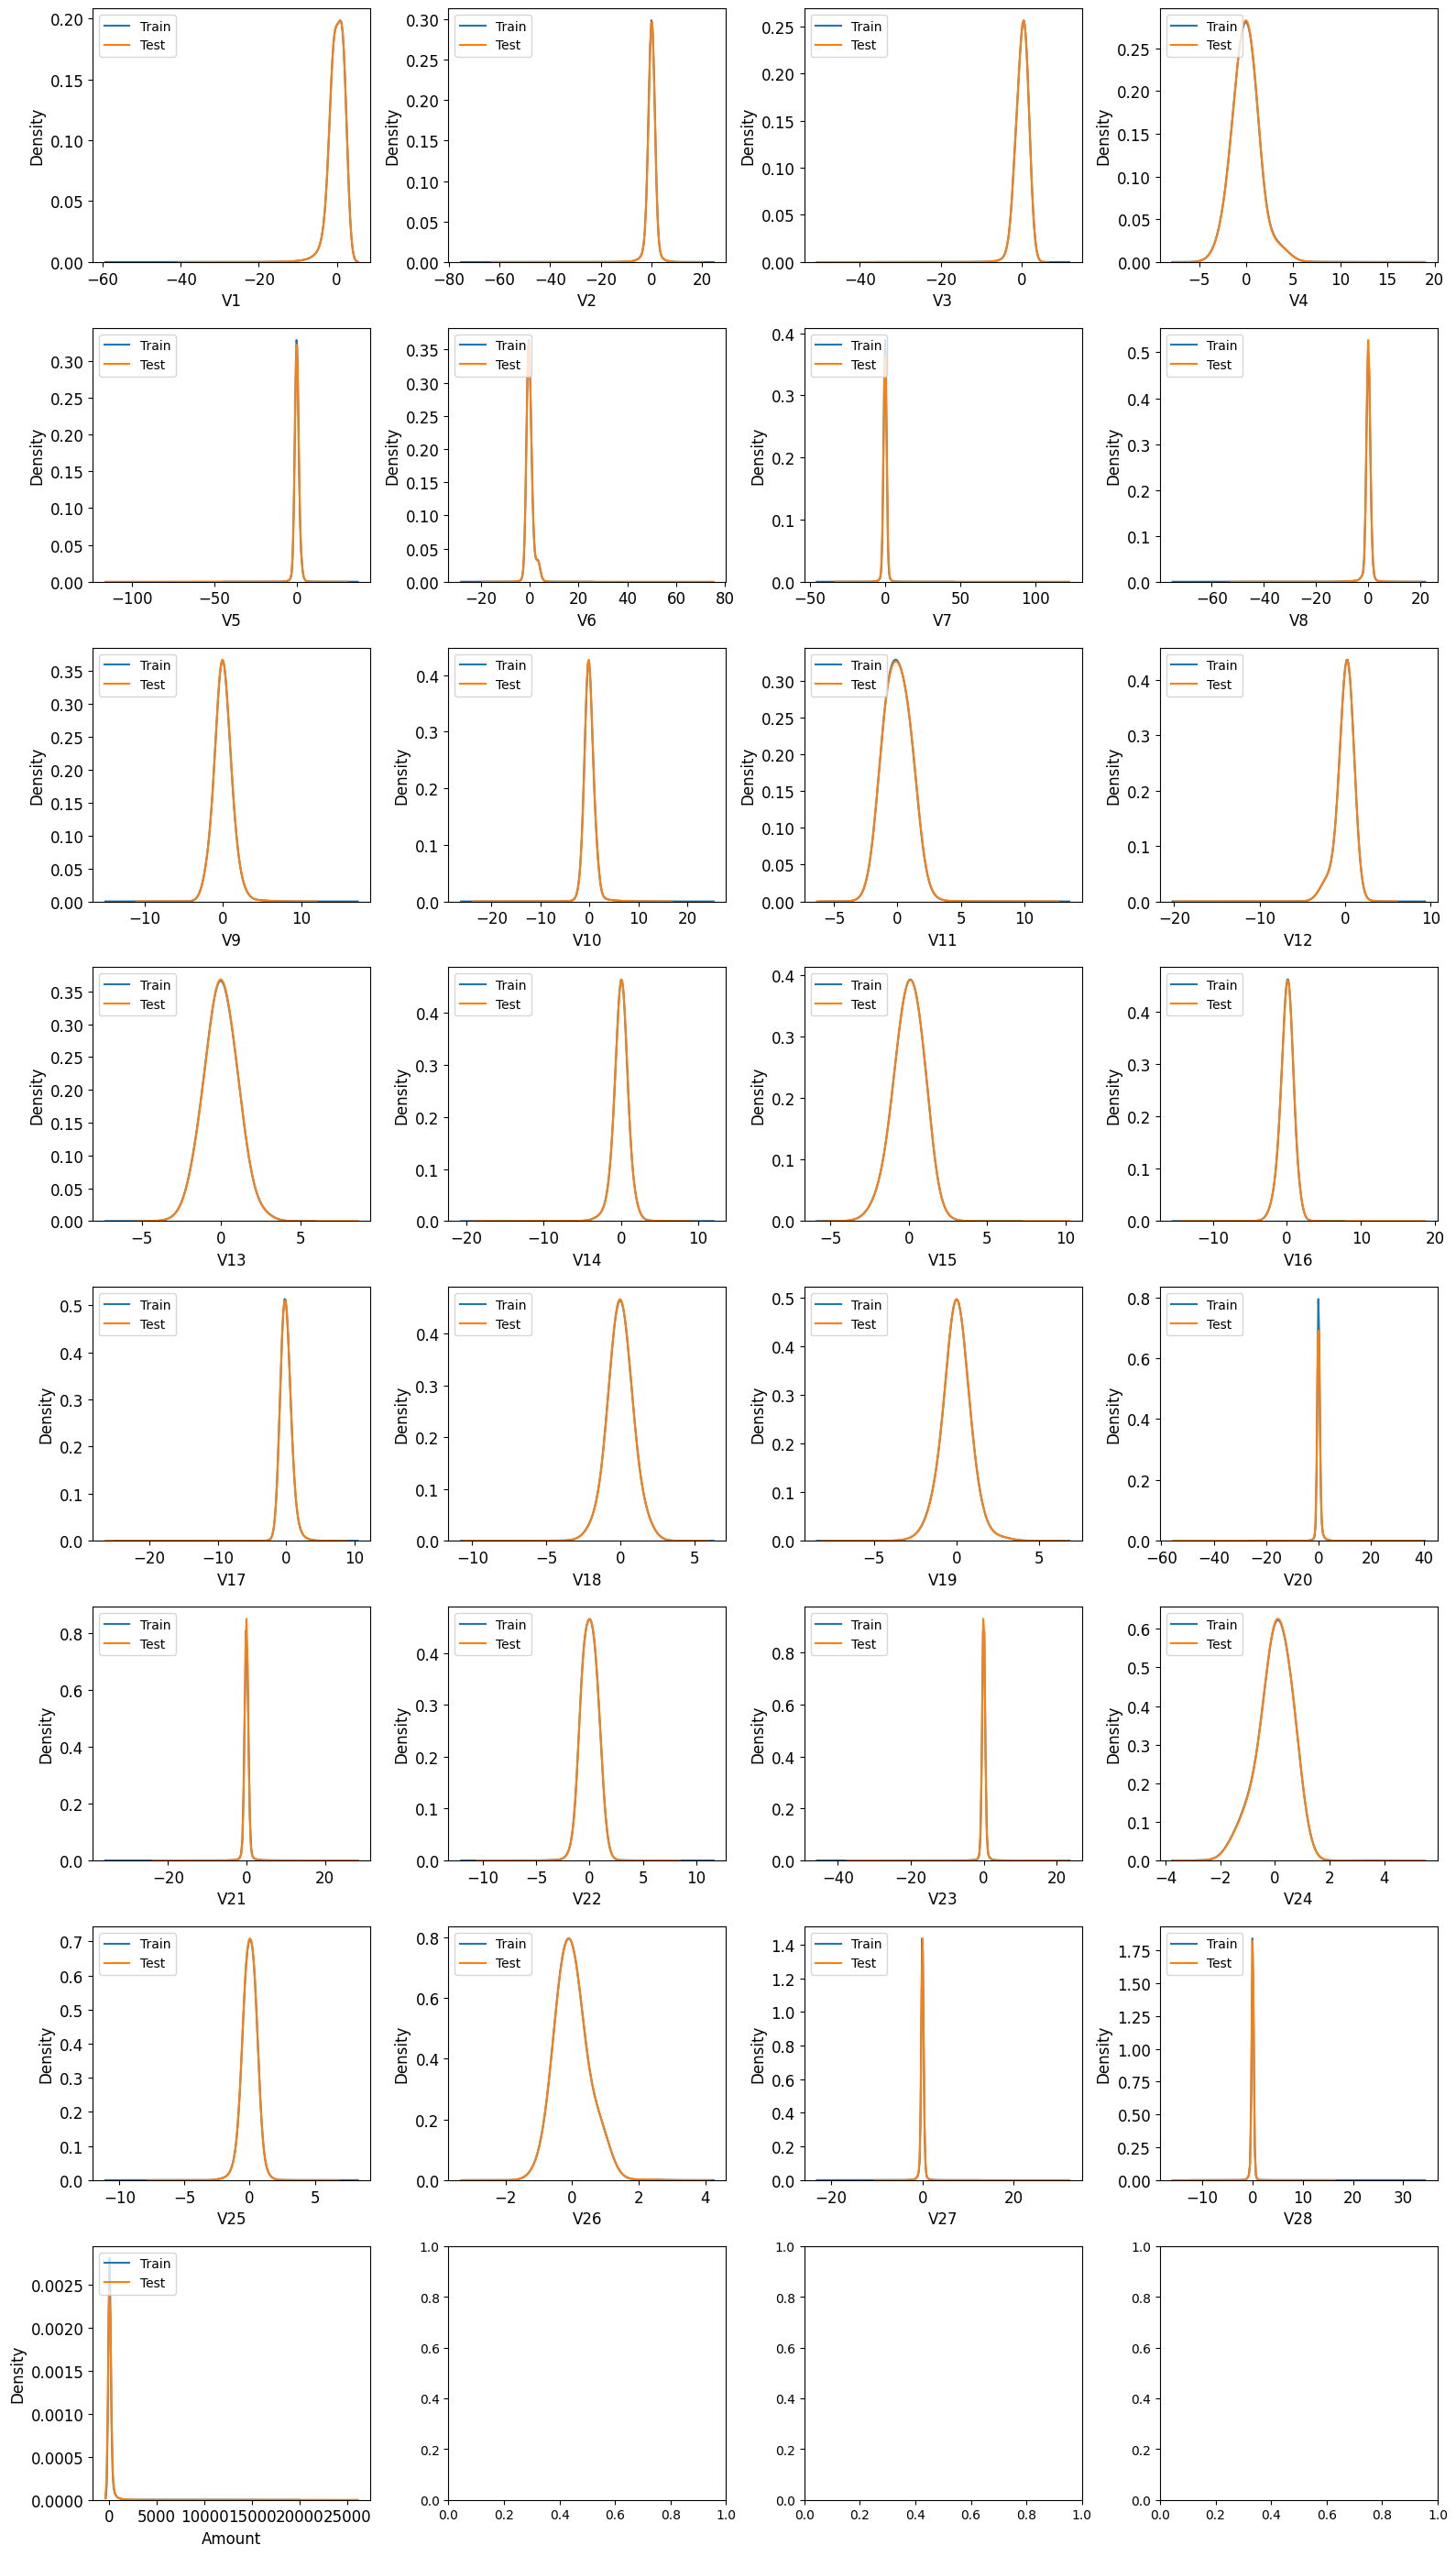

In [21]:
# Drop target valriable from transformation
cols = df_train.columns.drop('Class')

i = 0

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in cols:
    if i <len(cols):
      i += 1
      plt.subplot(8,4,i)
      sns.kdeplot(df_train[feature], bw=0.5,label="Train")
      sns.kdeplot(df_test[feature], bw=0.5,label="Test")
      plt.xlabel(feature, fontsize=12)
      plt.ylabel('Density', fontsize=12)
      locs, labels = plt.xticks()
      plt.legend(loc='upper left')
      plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show();

Let's perform transformation on priciple components and the amount feature

In [22]:
#import necessary package
from sklearn.preprocessing import PowerTransformer

In [23]:
#Instantiate
ptf = PowerTransformer(standardize=True,copy=False)

# Fit on train dataset
df_train[cols] = ptf.fit_transform(df_train[cols])  

# Transform the test dataset:
df_test[cols] = ptf.transform(df_test[cols])

In [24]:
df_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,...,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,2.136050e+05,213605.000000
mean,-7.221686e-17,1.808748e-17,-3.708973e-18,-3.276537e-17,-8.815048e-19,-1.899393e-17,-3.442858e-18,-8.033336e-18,2.714369e-17,-3.116868e-17,...,-5.571775e-18,-4.973017e-18,8.715255e-18,2.734328e-17,-2.647841e-17,2.740981e-17,5.671568e-18,-3.409594e-18,-1.783134e-16,0.001727
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.041527
min,-8.497262e+00,-2.380098e+01,-1.021072e+01,-5.013259e+00,-3.087259e+01,-4.104530e+01,-3.179255e+01,-2.744354e+01,-1.626314e+01,-3.143129e+01,...,-6.263637e+01,-1.324181e+01,-5.726397e+01,-3.548975e+00,-1.461683e+01,-7.735271e+00,-3.965617e+01,-4.734918e+01,-2.015225e+00,0.000000
25%,-7.235432e-01,-4.527627e-01,-7.118068e-01,-5.707870e-01,-5.076395e-01,-5.574271e-01,-4.642528e-01,-2.757220e-01,-5.619493e-01,-4.756062e-01,...,-2.986977e-01,-7.541654e-01,-2.734538e-01,-6.571139e-01,-6.345179e-01,-6.502624e-01,-2.019714e-01,-1.540209e-01,-7.396212e-01,0.000000
50%,-2.484949e-01,-4.155067e-02,-2.394552e-02,6.225425e-02,-4.199121e-02,-1.177027e-01,2.115243e-02,-5.566878e-02,7.434193e-03,-4.613784e-02,...,-2.311596e-02,-1.164073e-02,-3.021336e-02,-2.758682e-02,-6.208669e-03,-1.835457e-02,-1.834614e-02,4.864819e-02,2.657859e-02,0.000000
75%,7.355711e-01,4.748520e-01,6.746630e-01,5.835141e-01,4.474755e-01,4.095734e-01,4.638521e-01,2.571948e-01,5.825511e-01,4.576363e-01,...,2.705966e-01,7.201762e-01,2.297697e-01,7.073938e-01,6.589831e-01,5.782976e-01,2.123956e-01,2.571105e-01,7.470139e-01,0.000000
max,1.868249e+00,2.338178e+01,1.136905e+01,8.473469e+00,2.546353e+01,1.029378e+01,4.103042e+01,3.807878e+01,1.080249e+01,1.652086e+01,...,2.915929e+01,1.644594e+01,4.448149e+01,1.034982e+01,1.908781e+01,4.953359e+00,4.206119e+01,7.367508e+01,3.565742e+00,1.000000


In [25]:
df_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,...,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000,71202.000000
mean,-0.002171,0.001763,-0.000872,-0.000856,-0.007240,-0.004031,0.008041,0.005348,0.003634,0.006831,...,-0.001565,0.002125,0.004751,0.002183,-0.003939,0.001581,-0.001273,-0.002849,-0.007966,0.001727
std,1.002732,1.001896,0.999445,0.996488,1.041197,0.986688,1.091559,1.003132,1.000337,1.003887,...,0.945690,0.992313,1.015635,0.990948,0.997778,1.002516,1.101371,1.061246,1.004397,0.041527
min,-6.748615,-20.521607,-13.130510,-4.849477,-83.325686,-24.500726,-23.064358,-20.977645,-10.979701,-28.027976,...,-39.388518,-11.601985,-47.574392,-3.503316,-10.589607,-8.008537,-19.319838,-64.399356,-2.015225,0.000000
25%,-0.724452,-0.453644,-0.711296,-0.564143,-0.509258,-0.561921,-0.459829,-0.275034,-0.557091,-0.468192,...,-0.298578,-0.753595,-0.272409,-0.653390,-0.636202,-0.649519,-0.202663,-0.154858,-0.774756,0.000000
50%,-0.252287,-0.038376,-0.023783,0.064198,-0.040509,-0.123825,0.023625,-0.057200,0.005159,-0.041620,...,-0.022977,-0.008934,-0.028905,-0.024979,-0.014208,-0.016456,-0.019442,0.047247,0.010595,0.000000
75%,0.736919,0.480470,0.671906,0.578147,0.442110,0.399840,0.462208,0.251766,0.583400,0.453941,...,0.269057,0.720619,0.230010,0.701522,0.651494,0.577813,0.212448,0.259819,0.746701,0.000000
max,1.859105,18.282914,4.081430,8.542178,20.865172,23.949973,116.932634,34.100529,7.514242,11.132149,...,29.159293,11.280585,43.539803,12.228012,14.959681,4.847958,125.499363,37.807175,3.685599,1.000000


Let's look at the distribution post transformation:

<Figure size 640x480 with 0 Axes>

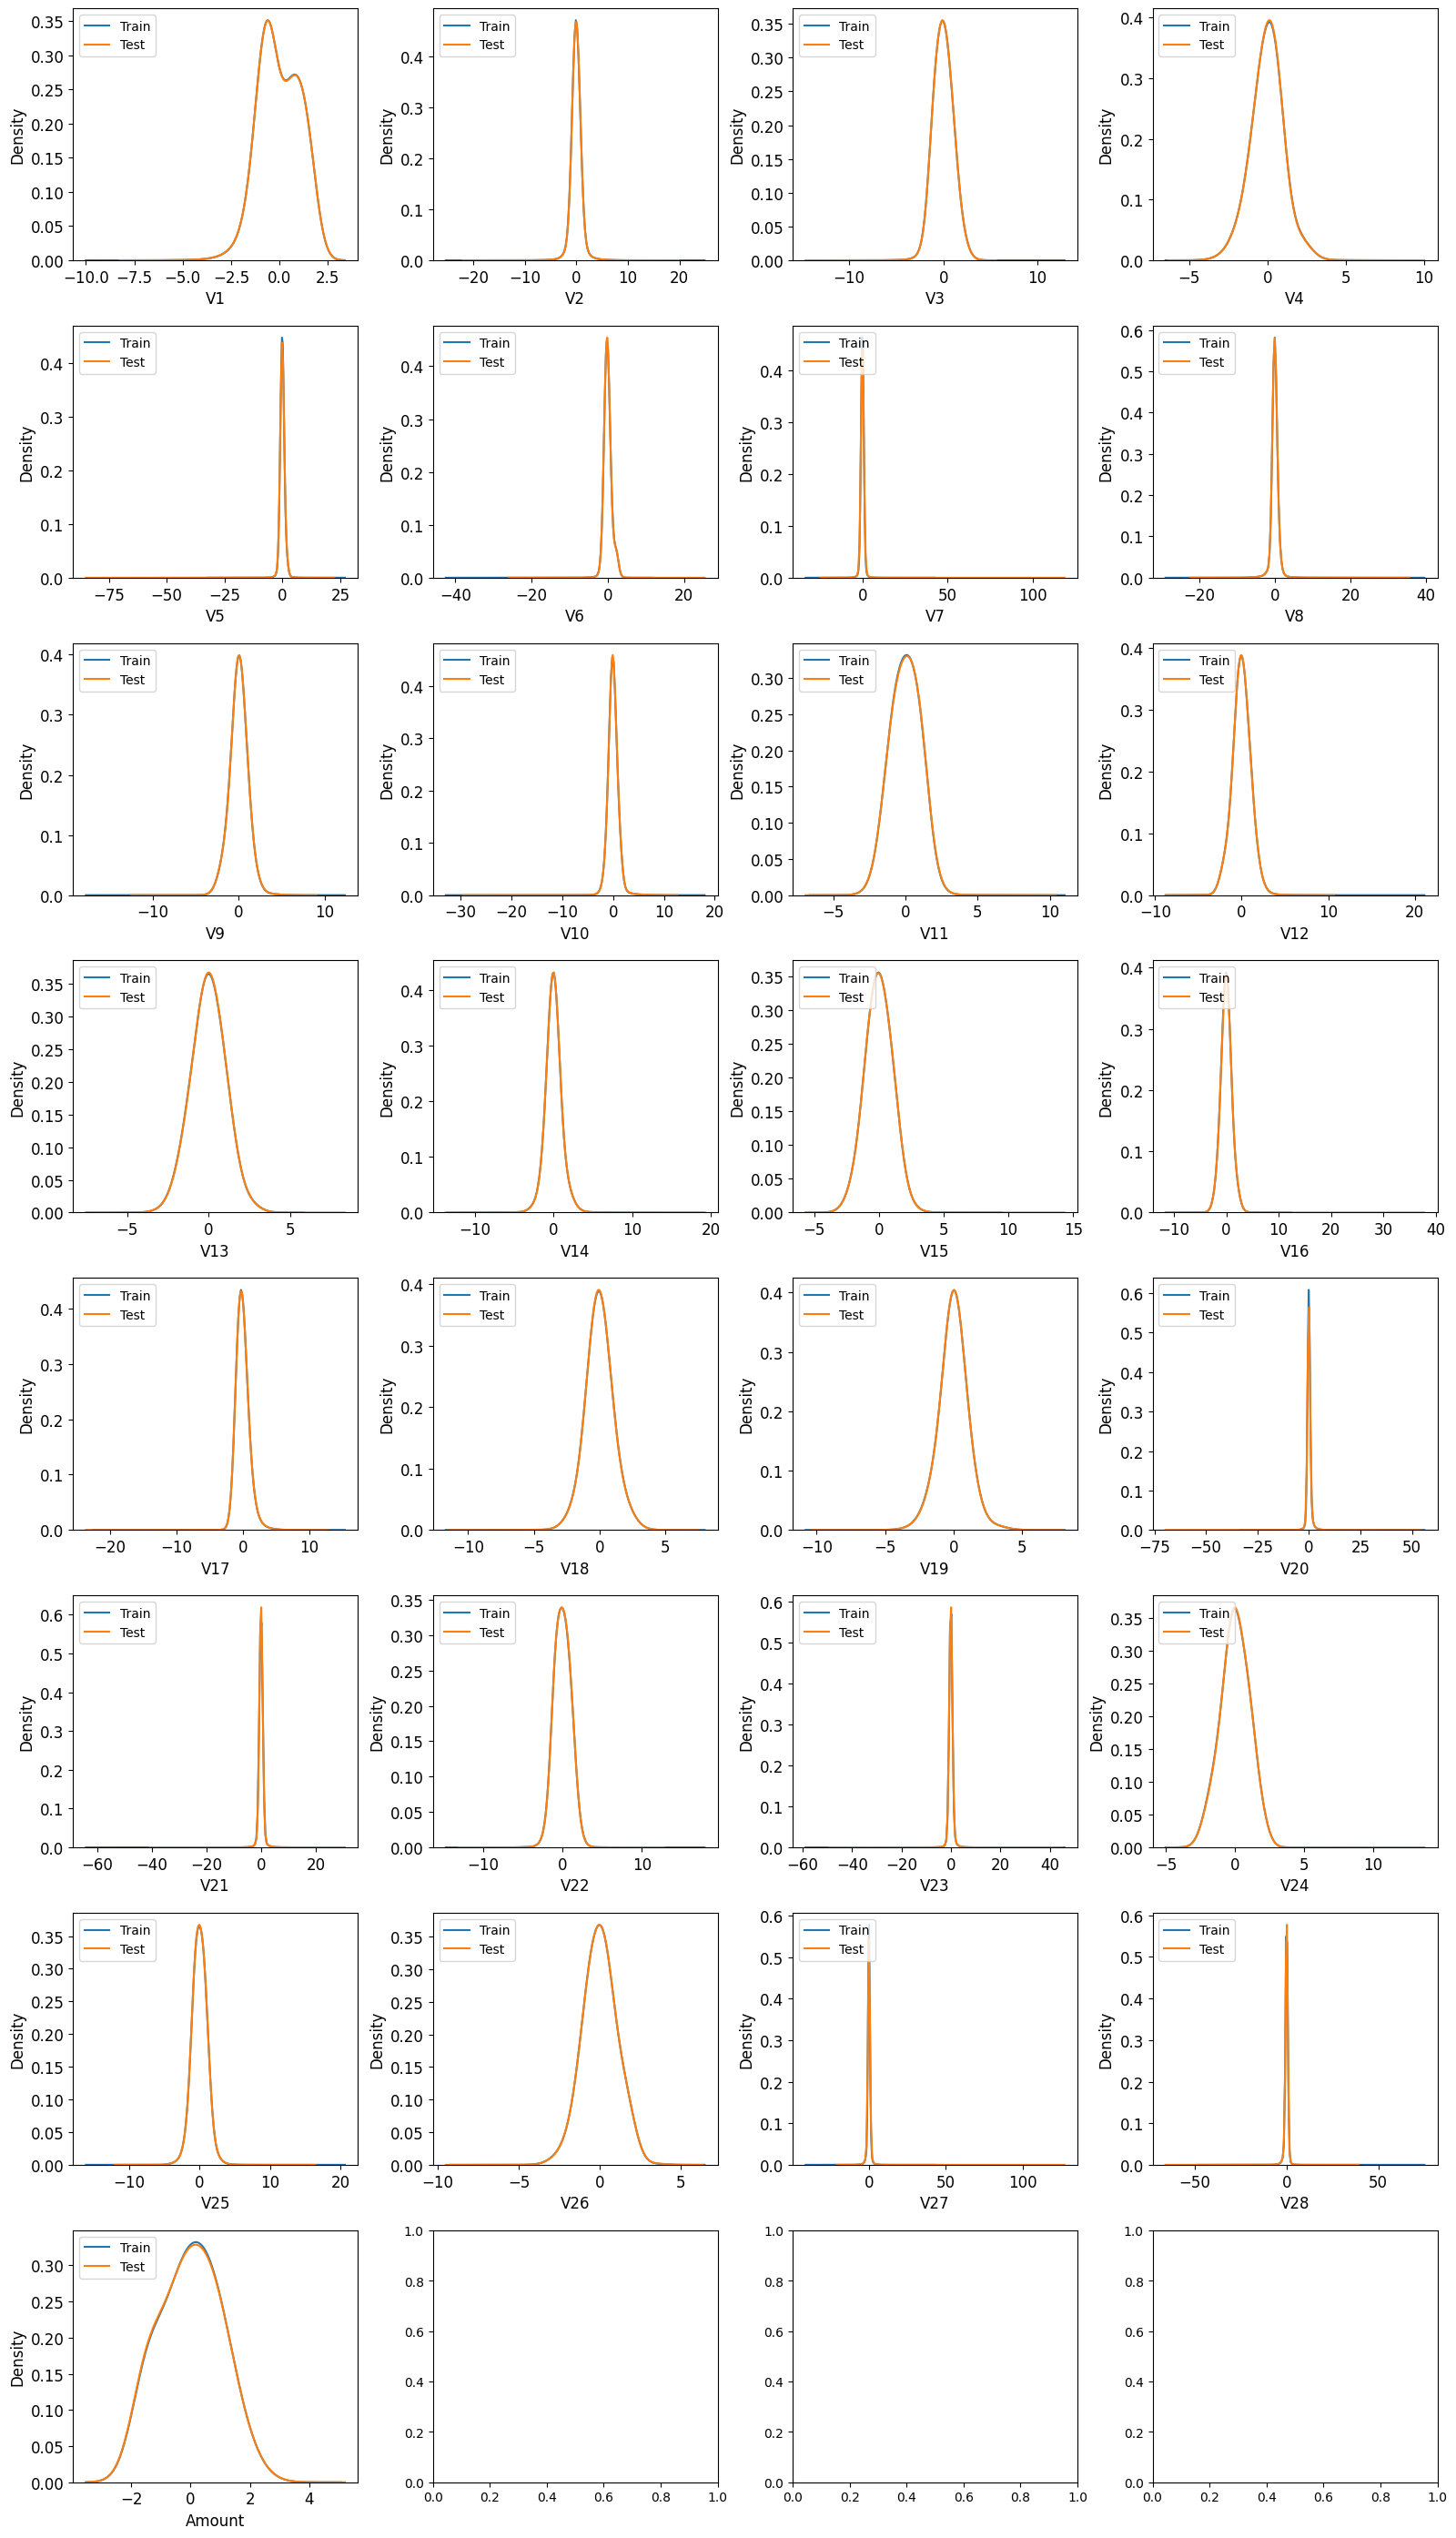

In [26]:
i = 0

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in cols:
    if i <len(cols):
      i += 1
      plt.subplot(8,4,i)
      sns.kdeplot(df_train[feature], bw=0.5,label="Train")
      sns.kdeplot(df_test[feature], bw=0.5,label="Test")
      plt.xlabel(feature, fontsize=12)
      plt.ylabel('Density', fontsize=12)
      locs, labels = plt.xticks()
      plt.legend(loc='upper left')
      plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show();

It is evident that the skewness has reduced to a certain level. Now let's split the train and test dataset into X_train,y_train and X_test, y_test respectively.

### Split the train and test datasets into X_train,y_train,X_test andy_test

In [27]:
y_train = df_train.pop('Class')
X_train = df_train
y_test = df_test.pop('Class')
X_test = df_test

In [28]:
print(X_train.shape)
print(X_test.shape)

(213605, 29)
(71202, 29)


In [29]:
print(y_train.shape)
print(y_test.shape)

(213605,)
(71202,)


## 3. Model Building and Selection

## 3.A. Model Building and Selection On Original Imbalanced Data

In [30]:
#import necessary libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score, classification_report

Before moving to model building, let's define a function which would evaluate all required metrics

In [31]:
#Define a table to hold all metrics calculated for different tables
metric_table = {'Metric': ['AUC Score','F1 Score','Accuracy','Sensitivity','Precision']}
metric_summary = pd.DataFrame(metric_table ,columns = ['Metric'] )

#Defining a function to calculate & print model metrics.
def GetMetrics(y_test,y_test_pred,y_test_pred_proba):
    metric = []
    cm = confusion_matrix(y_test,y_test_pred)
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    accuracy = metrics.accuracy_score(y_test, y_test_pred)
    auc_score = metrics.roc_auc_score(y_test,y_test_pred_proba[:,1])
    f1Score = f1_score(y_test,y_test_pred)
    
    #Print model metrics
    print("Classification report:\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix:")
    print(cm)
    print("\nAUC Score: ", round(auc_score,3))
    metric.append(round(auc_score,3))
    print("F1 Score: ", round(f1Score,3))
    metric.append(round(f1Score,3))
    print("Accuracy:", round(accuracy,3))
    metric.append(round(accuracy,3))
    print("Recall/Sensitivity: ", round(sensitivity,3))
    metric.append(round(sensitivity,3))
    print("Precision: ", round(precision,3))
    metric.append(round(precision,3))
    
    #Draw ROC graph
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred_proba[:,1])
    roc_auc = round(metrics.auc(fpr, tpr),2)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.figure(figsize=[9,5])
    plt.style.use('default')
    plt.grid()
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.tight_layout()
    plt.show()
    
    return metric

### Model 1: Vanilla Logistic Regression Without CV

1. Build and Train the desired model 

In [32]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression

# instantiate a logistic regression object
lr_model1 = LogisticRegression()

#fit the model on train data
lr_model1.fit(X_train, y_train)

LogisticRegression()


2. Making predictions using the model built on the test data

In [33]:
print('Start:',dt.datetime.now())

#predict the probabilty of class using the built model
y_test_pred_proba = lr_model1.predict_proba(X_test)

#predict the class using the built model
y_test_pred = lr_model1.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 19:30:34.883932
End: 2022-01-24 19:30:34.902934


3. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.61      0.71       123

    accuracy                           1.00     71202
   macro avg       0.93      0.80      0.86     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71066    13]
 [   48    75]]

AUC Score:  0.969
F1 Score:  0.711
Accuracy: 0.999
Recall/Sensitivity:  0.61
Precision:  0.852
ROC for the test dataset 97.0%


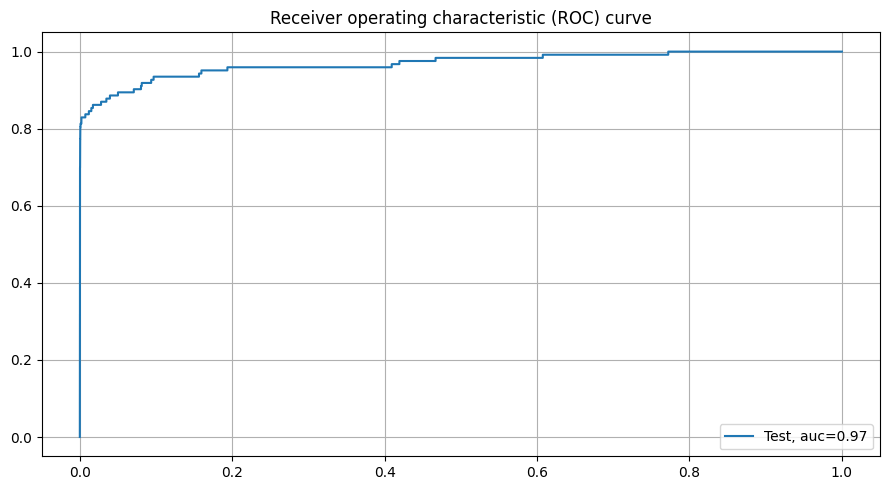

In [34]:
#call the user defined function to observe all the relevant metrics
lr_metrics1 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

4. Store metrics in a dataframe to analyse later

In [35]:
#Store metrics in a table
metric_series = pd.Series(lr_metrics1, name = 'LR w/o CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV
Metric,
AUC Score,0.969
F1 Score,0.711
Accuracy,0.999
Sensitivity,0.610
Precision,0.852


### Model 2: Logistic Regression With CV

1. Let's start by defining the hyperparameters for gridsearch and creating a gridsearch object

In [36]:
#import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# logistic regression - the class weight is used to handle class imbalance - 
#it adjusts the cost function without modifying the data. Hence the underlying data is still imbalanced.
lr = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# hyperparameter space
params = {'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# create 5 folds as this will allow sufficient(100) number of 1's in each batch of the k-fold
#Using StratifiedKFold will ensure that minority calss is distributed equally thereby facilitating the model to learn better
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
lr_model2 = GridSearchCV(lr, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of logistic regression, hence a logistic regression model will be built and trained on X_train

In [37]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with logistic regression as estimator
lr_model2.fit(X_train, y_train)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(lr_model2.best_score_,2))
print("Best hyperparameters: ", lr_model2.best_params_)

Start: 2022-01-24 19:30:35.410973
Fitting 5 folds for each of 24 candidates, totalling 120 fits
End: 2022-01-24 19:31:19.703101

Best AUC:  0.98
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


3. Making predictions using the model built on the test data

In [38]:
print('Start:',dt.datetime.now())

#predict the probabilty of class using the built model
y_test_pred_proba = lr_model2.predict_proba(X_test)

#predict the class using the built model
y_test_pred = lr_model2.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 19:31:19.719621
End: 2022-01-24 19:31:19.734624


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.75      0.80      0.77       123

    accuracy                           1.00     71202
   macro avg       0.87      0.90      0.89     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71046    33]
 [   25    98]]

AUC Score:  0.973
F1 Score:  0.772
Accuracy: 0.999
Recall/Sensitivity:  0.797
Precision:  0.748
ROC for the test dataset 97.0%


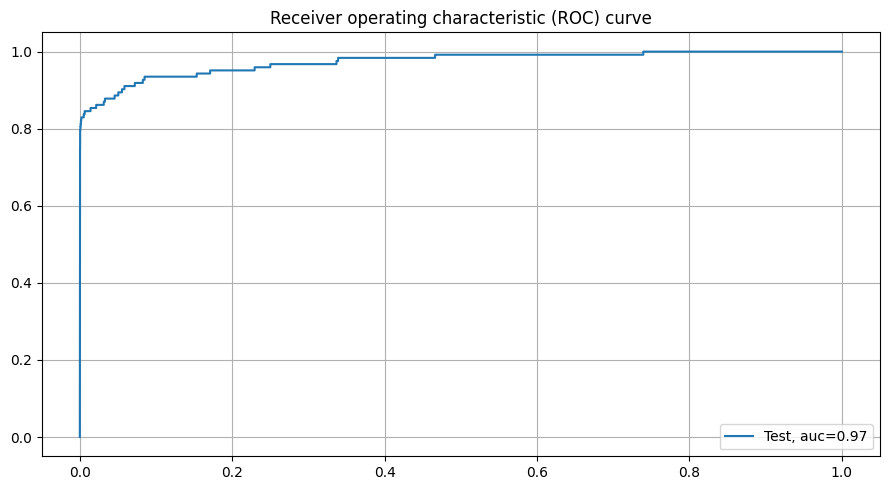

In [39]:
#call the user defined function to observe all the relevant metrics
lr_metrics2 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [40]:
#Store metrics in a table
metric_series = pd.Series(lr_metrics2, name = 'LR with CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV
Metric,,
AUC Score,0.969,0.973
F1 Score,0.711,0.772
Accuracy,0.999,0.999
Sensitivity,0.610,0.797
Precision,0.852,0.748


### Model 3: KNN Classifier w/o CV

KNN is computationally resource intensive. Hence we will be performing KNN without cross validation and moving on

1. Build and Train the desired model 

In [41]:
#import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# instantiate a KNN object
knn_model1 = KNeighborsClassifier(n_neighbors=5) #default parameter of n_neighbors = 5

#fit the model on train data
knn_model1.fit(X_train, y_train)

KNeighborsClassifier()

2. Making predictions using the model built on the test data

In [42]:
print('Start:',dt.datetime.now())

#predict the probabilty of class using the built model
y_test_pred_proba = knn_model1.predict_proba(X_test)

#predict the class using the built model
y_test_pred = knn_model1.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 19:31:20.230061
End: 2022-01-24 19:42:25.894652


3. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.90      0.75      0.82       123

    accuracy                           1.00     71202
   macro avg       0.95      0.87      0.91     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71069    10]
 [   31    92]]

AUC Score:  0.915
F1 Score:  0.818
Accuracy: 0.999
Recall/Sensitivity:  0.748
Precision:  0.902
ROC for the test dataset 91.0%


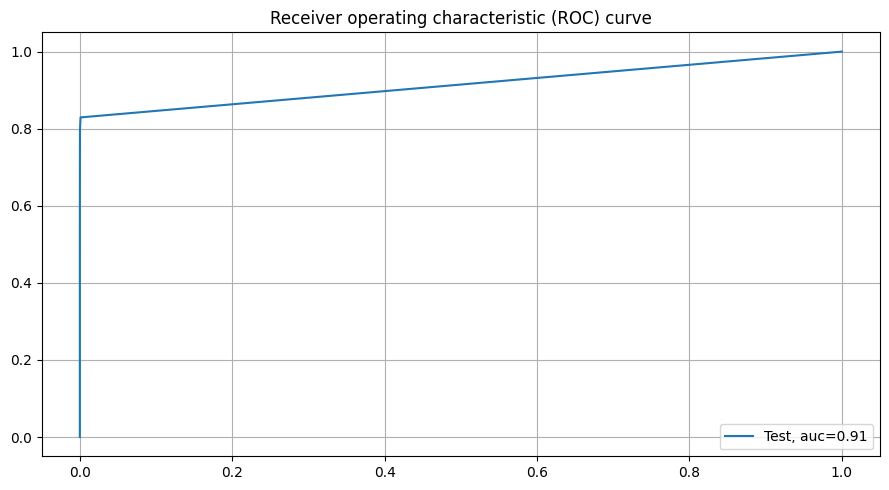

In [43]:
#call the user defined function to observe all the relevant metrics
knn_metrics1 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

4. Store metrics in a dataframe to analyse later

In [44]:
#Store metrics in a table
metric_series = pd.Series(knn_metrics1, name = 'KNN w/o CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV
Metric,,,
AUC Score,0.969,0.973,0.915
F1 Score,0.711,0.772,0.818
Accuracy,0.999,0.999,0.999
Sensitivity,0.610,0.797,0.748
Precision,0.852,0.748,0.902


### Model 4: DecisionTree Classifier w/o CV

1. Build and Train the desired model 

In [45]:
#import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree object
dt_model1 = DecisionTreeClassifier()

#fit the model on train data
dt_model1.fit(X_train, y_train)

DecisionTreeClassifier()

2. Making predictions using the model built on the test data

In [46]:
print('Start:',dt.datetime.now())

#predict the probabilty of class using the built model
y_test_pred_proba = dt_model1.predict_proba(X_test)

#predict the class using the built model
y_test_pred = dt_model1.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 19:42:39.552270
End: 2022-01-24 19:42:39.593272


3. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.77      0.77      0.77       123

    accuracy                           1.00     71202
   macro avg       0.89      0.89      0.89     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71051    28]
 [   28    95]]

AUC Score:  0.886
F1 Score:  0.772
Accuracy: 0.999
Recall/Sensitivity:  0.772
Precision:  0.772
ROC for the test dataset 89.0%


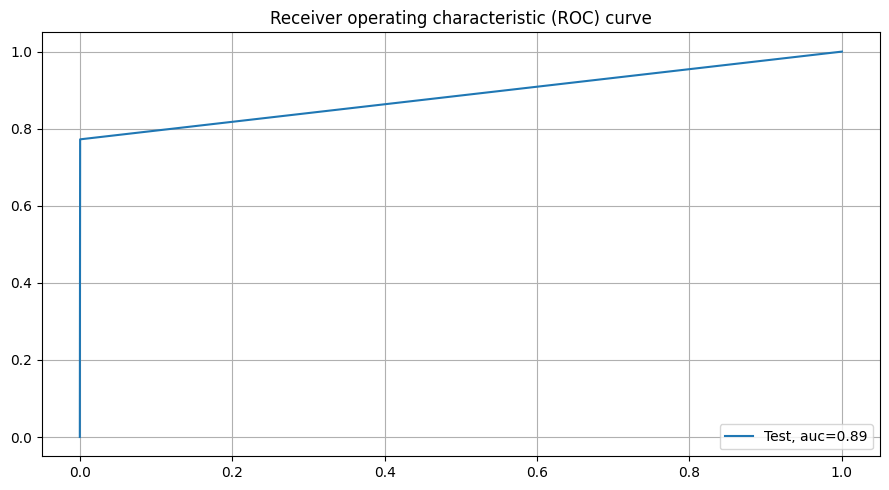

In [47]:
#call the user defined function to observe all the relevant metrics
dt_metrics1 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

4. Store metrics in a dataframe to analyse later

In [48]:
#Store metrics in a table
metric_series = pd.Series(dt_metrics1, name = 'DT w/o CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV
Metric,,,,
AUC Score,0.969,0.973,0.915,0.886
F1 Score,0.711,0.772,0.818,0.772
Accuracy,0.999,0.999,0.999,0.999
Sensitivity,0.610,0.797,0.748,0.772
Precision,0.852,0.748,0.902,0.772


### Model 5: DecisionTree Classifier with CV

Let's look at the default parameters used by the decision tree model built previously

In [49]:
dt_model1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

1. Let's start by defining the hyperparameters for gridsearch and creating a gridsearch object

In [50]:
# Decision Tree - the class weight is used to handle class imbalance - 
#it adjusts the cost function without modifying the data. Hence the underlying data is still imbalanced
dtree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9})

# hyperparameter space
params = {"criterion": ["gini", "entropy"], "max_depth": [2,3,4], "min_samples_leaf": [5,6,7]}

# Create 5 folds as this will allow sufficient(100) number of 1's in each batch of the k-fold
# Using StratifiedKFold will ensure that minority calss is distributed equally thereby facilitating the model to learn better
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dt_model2 = GridSearchCV(dtree, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of decision tree, hence a decision tree model will be built and trained on X_train

In [51]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with decision tree as estimator
dt_model2.fit(X_train, y_train)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(dt_model2.best_score_,2))
print("Best hyperparameters: ", dt_model2.best_params_)

Start: 2022-01-24 19:42:39.950098
Fitting 5 folds for each of 18 candidates, totalling 90 fits
End: 2022-01-24 19:44:04.076125

Best AUC:  0.93
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}


3. Making predictions using the model built on the test data

In [52]:
print('Start:',dt.datetime.now())

#predict the probabilty of class using the built model
y_test_pred_proba = dt_model2.predict_proba(X_test)

#predict the class using the built model
y_test_pred = dt_model2.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 19:44:04.093127
End: 2022-01-24 19:44:04.122128


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.64      0.81      0.72       123

    accuracy                           1.00     71202
   macro avg       0.82      0.91      0.86     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71023    56]
 [   23   100]]

AUC Score:  0.923
F1 Score:  0.717
Accuracy: 0.999
Recall/Sensitivity:  0.813
Precision:  0.641
ROC for the test dataset 92.0%


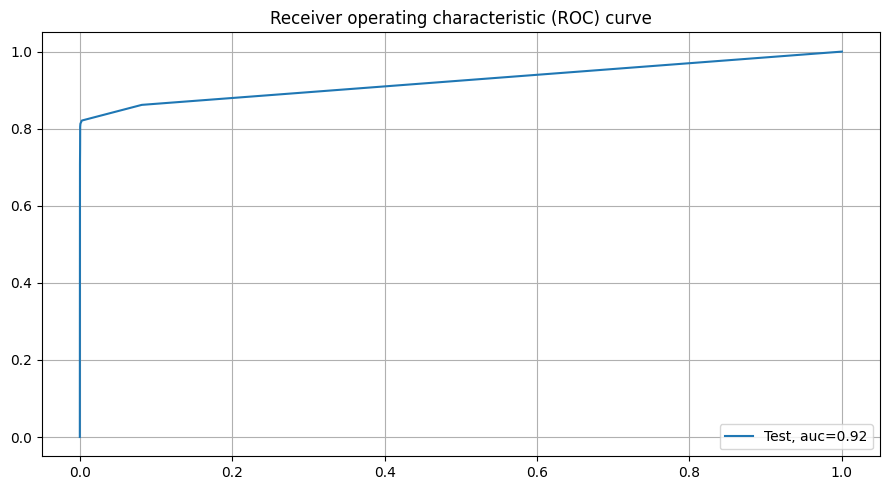

In [53]:
#call the user defined function to observe all the relevant metrics
dt_metrics2 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [54]:
#Store metrics in a table
metric_series = pd.Series(dt_metrics2, name = 'DT with CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV
Metric,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923
F1 Score,0.711,0.772,0.818,0.772,0.717
Accuracy,0.999,0.999,0.999,0.999,0.999
Sensitivity,0.610,0.797,0.748,0.772,0.813
Precision,0.852,0.748,0.902,0.772,0.641


### Model 6: RandomForest Classifier w/o CV

1. Build and Train the desired model 

In [55]:
#import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# instantiate a random forest object
rf_model1 = RandomForestClassifier()

#fit the model on train data
rf_model1.fit(X_train, y_train)

RandomForestClassifier()

2. Making predictions using the model built on the test data

In [56]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = rf_model1.predict_proba(X_test)

#predict the class using the built model
y_test_pred = rf_model1.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 19:47:10.392730
End: 2022-01-24 19:47:11.782832


3. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.77      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71073     6]
 [   28    95]]

AUC Score:  0.933
F1 Score:  0.848
Accuracy: 1.0
Recall/Sensitivity:  0.772
Precision:  0.941
ROC for the test dataset 93.0%


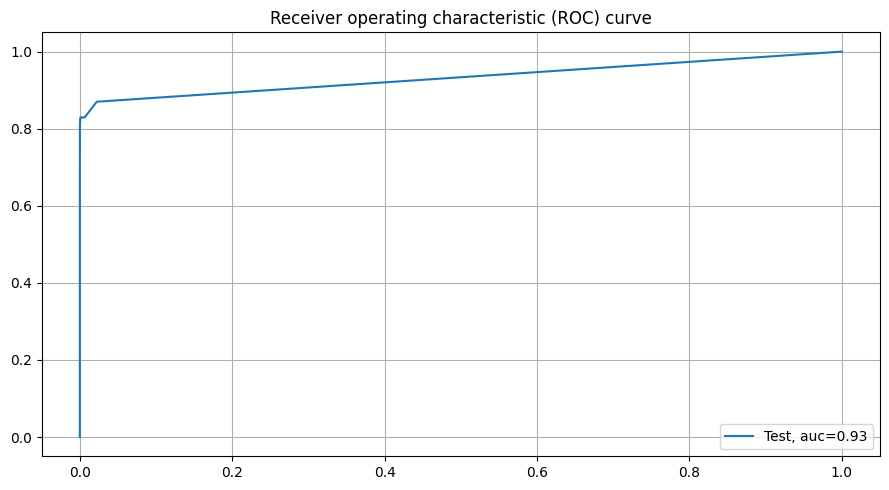

In [57]:
#call the user defined function to observe all the relevant metrics
rf_metrics1 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

4. Store metrics in a dataframe to analyse later

In [58]:
#Store metrics in a table
metric_series = pd.Series(rf_metrics1, name = 'RF w/o CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV
Metric,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772
Precision,0.852,0.748,0.902,0.772,0.641,0.941


### Model 7: RandomForest Classifier with CV

Let's look at the default parameters used by the random forest model built previously

In [59]:
rf_model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

1. Let's start by defining the hyperparameters for gridsearch and creating a gridsearch object

In [60]:
# Random Forest - the class weight is used to handle class imbalance - 
#it adjusts the cost function without modifying the data. Hence the underlying data is still imbalanced
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})

# hyperparameter space
params = {
    'n_estimators': [90,100,110], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Create 5 folds as this will allow sufficient(100) number of 1's in each batch of the k-fold
# Using StratifiedKFold will ensure that minority calss is distributed equally thereby facilitating the model to learn better
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model2 = GridSearchCV(rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of Random Forest, hence a Random Forest model will be built and trained on X_train

In [61]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with random forest as estimator
rf_model2.fit(X_train, y_train)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(rf_model2.best_score_,2))
print("Best hyperparameters: ", rf_model2.best_params_)

Start: 2022-01-24 19:47:12.153865
Fitting 5 folds for each of 24 candidates, totalling 120 fits
End: 2022-01-24 20:17:36.478883

Best AUC:  0.99
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 110}


3. Making predictions using the model built on the test data

In [62]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = rf_model2.predict_proba(X_test)

#predict the class using the built model
y_test_pred = rf_model2.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 20:17:36.504885
End: 2022-01-24 20:17:37.753977


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.78      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71074     5]
 [   27    96]]

AUC Score:  0.972
F1 Score:  0.857
Accuracy: 1.0
Recall/Sensitivity:  0.78
Precision:  0.95
ROC for the test dataset 97.0%


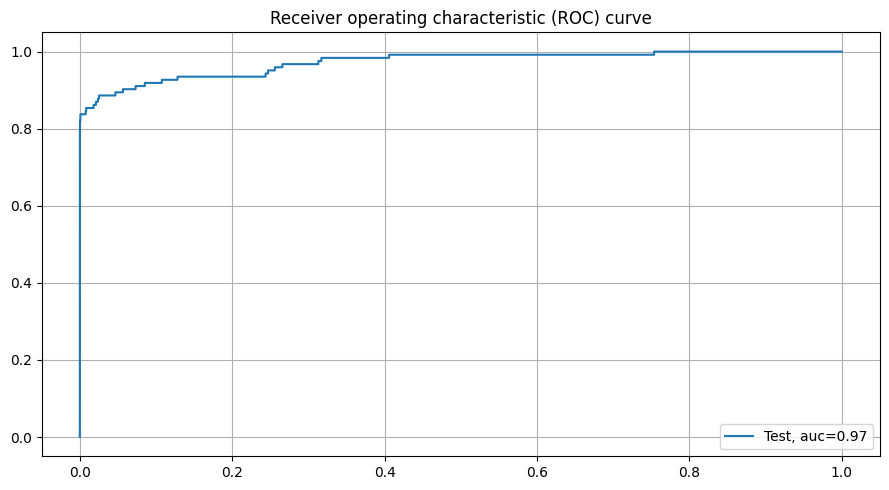

In [63]:
#call the user defined function to observe all the relevant metrics
rf_metrics2 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [64]:
#Store metrics in a table
metric_series = pd.Series(rf_metrics2, name = 'RF with CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV
Metric,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950


### Model 8: XGBoost Classifier w/o CV

1. Build and Train the desired model 

In [65]:
#import necessary libraries
from xgboost import XGBClassifier

# instantiate a logistic regression object
xgb_model1 = XGBClassifier()

#fit the model on train data
xgb_model1.fit(X_train, y_train)

[20:17:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

2. Making predictions using the model built on the test data

In [66]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = xgb_model1.predict_proba(X_test)

#predict the class using the built model
y_test_pred = xgb_model1.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 20:18:08.066792
End: 2022-01-24 20:18:08.213803


3. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.77      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71074     5]
 [   28    95]]

AUC Score:  0.966
F1 Score:  0.852
Accuracy: 1.0
Recall/Sensitivity:  0.772
Precision:  0.95
ROC for the test dataset 97.0%


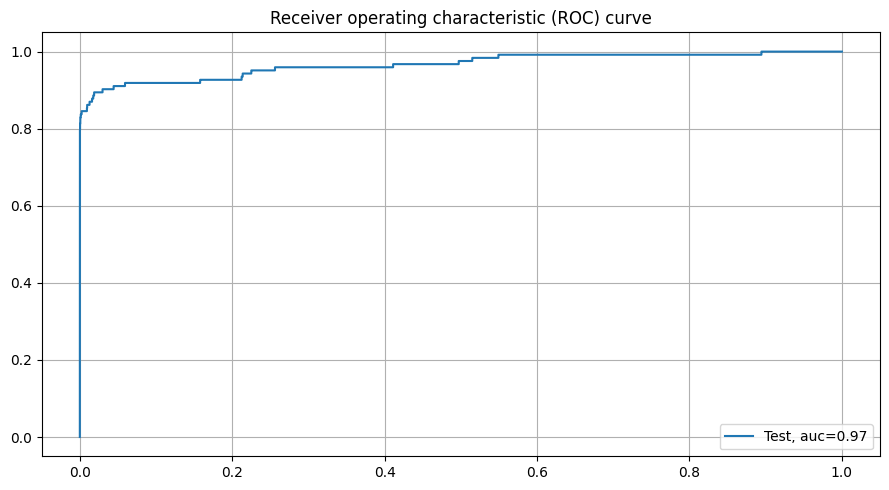

In [67]:
#call the user defined function to observe all the relevant metrics
xgb_metrics1 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

4. Store metrics in a dataframe to analyse later

In [68]:
#Store metrics in a table
metric_series = pd.Series(xgb_metrics1, name = 'XGB w/o CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV
Metric,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950


### Model 9: XGBoost Classifier with CV

Let's look at the default parameters used by the random forest model built previously

In [69]:
xgb_model1.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

1. Let's start by defining the hyperparameters for gridsearch and creating a gridsearch object

In [70]:
# XG Boost
xgb = XGBClassifier()

# hyperparameter space
params = {
    'learning_rate': [0.1, 0.2], 
    'subsample': [0.6, 0.9],
    'n_estimators': [100,120],
    'max_depth': [4,6,8],
    'objective': ['binary:logistic']
} 


# Create 5 folds as this will allow sufficient(100) number of 1's in each batch of the k-fold
# Using StratifiedKFold will ensure that minority calss is distributed equally thereby facilitating the model to learn better
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
xgb_model2 = GridSearchCV(xgb, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of xgboost, hence an xgboost model will be built and trained on X_train

In [71]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with XGB as estimator
xgb_model2.fit(X_train, y_train)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(xgb_model2.best_score_,2))
print("Best hyperparameters: ", xgb_model2.best_params_)

Start: 2022-01-24 20:18:08.656836
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[20:57:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
End: 2022-01-24 20:57:41.128317

Best AUC:  0.99
Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 120, 'objective': 'binary:logistic', 'subsample': 0.6}


3. Making predictions using the model built on the test data

In [72]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = xgb_model2.predict_proba(X_test)

#predict the class using the built model
y_test_pred = xgb_model2.predict(X_test)
print(dt.datetime.now())

print('End:',dt.datetime.now())

Start: 2022-01-24 20:57:41.150319
2022-01-24 20:57:41.304330
End: 2022-01-24 20:57:41.304330


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.93      0.77      0.84       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71072     7]
 [   28    95]]

AUC Score:  0.969
F1 Score:  0.844
Accuracy: 1.0
Recall/Sensitivity:  0.772
Precision:  0.931
ROC for the test dataset 97.0%


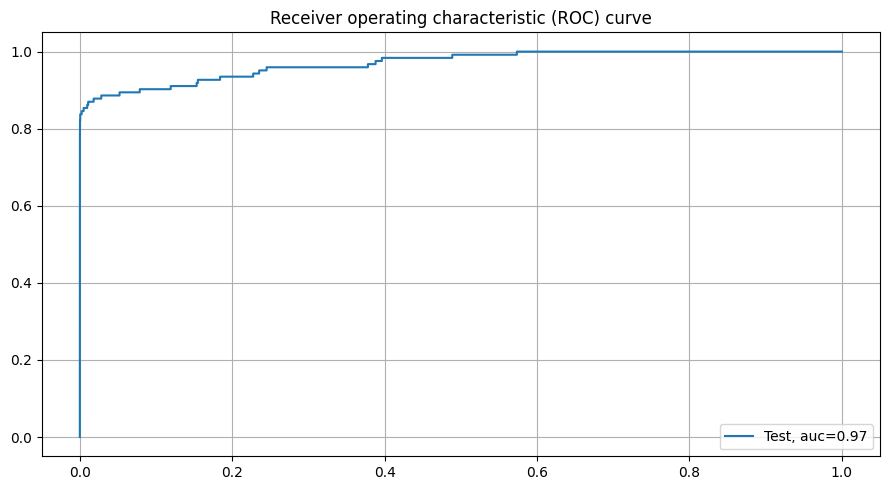

In [73]:
#call the user defined function to observe all the relevant metrics
xgb_metrics2 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [74]:
#Store metrics in a table
metric_series = pd.Series(xgb_metrics2, name = 'XGB with CV')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV
Metric,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931


#### Inference:

Upon comparing the metrics in above table, Decision Tree with cross validation is the model with the best result for Recall/Sensitivity. But the AUC Score and F1 score are better for Logistic Regression with cross validation indicating that the precision is better for Logistic regression with cross validation than that for Decision Tree. Because both Precision and Recall are optimum for logistic regression with cross validation, I would declare that as the optimum model among the rest built above.<br>
But if I am purely focusing on fraud detection, then I would declare Decision tree with cross validation as the better model.

Let's now build the model with the best hyperparameters obtained as part of tuning performed above:

In [75]:
#Define best params based on what was obtained during cross validation
params = {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}

#Create decision tree object using those parameters, 
#class_weights added as we are still using imbalanced data and there is class imbalance
dtree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9},**params)

#Validate those parameters
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': {0: 0.1, 1: 0.9},
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.65      0.81      0.72       123

    accuracy                           1.00     71202
   macro avg       0.82      0.91      0.86     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71024    55]
 [   23   100]]

AUC Score:  0.923
F1 Score:  0.719
Accuracy: 0.999
Recall/Sensitivity:  0.813
Precision:  0.645
ROC for the test dataset 92.0%


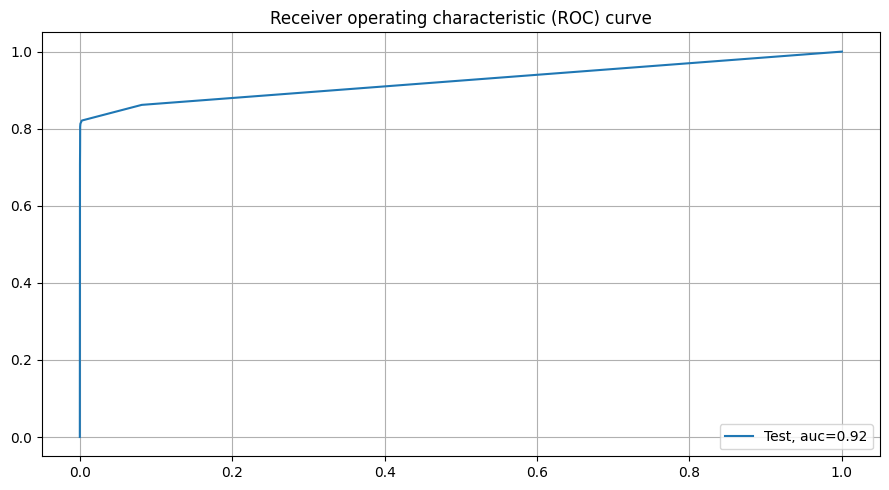

In [76]:
# Fit the model
dtree.fit(X_train, y_train)

#predit the probabilty of class using the built model
y_test_pred_proba = dtree.predict_proba(X_test)

#predict the class using the built model
y_test_pred = dtree.predict(X_test)

F_metric = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

In [77]:
#Let's take a look at the feature importance assigned as per model
dtree.feature_importances_

array([0.        , 0.        , 0.        , 0.03128676, 0.        ,
       0.        , 0.00263906, 0.        , 0.        , 0.05924935,
       0.        , 0.        , 0.        , 0.82650527, 0.        ,
       0.        , 0.07255669, 0.        , 0.        , 0.00776287,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 17
3rd Top var = 10


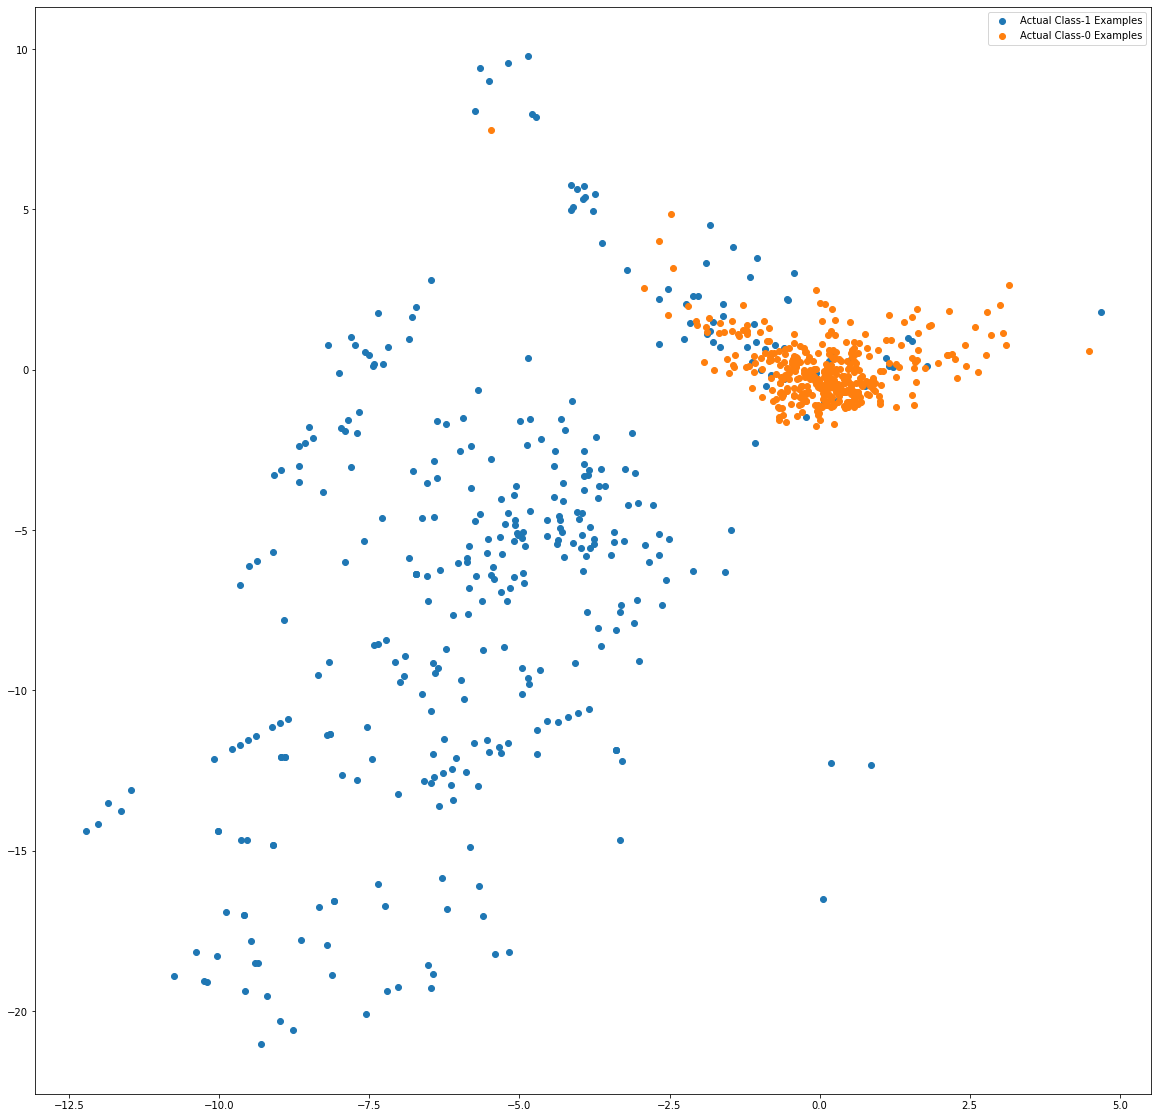

In [78]:
var_imp = []
for i in dtree.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(dtree.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(dtree.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(dtree.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(dtree.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(dtree.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## 3.B. Model Building and Selection On Synthetic Balanced Data

### 1. Random Oversampling

Let's perform random oversampling. Random Oversampling assigns weights to randomly chosen data points from the minority class (fraud). In this way, the occurrence of each data point will be multiplied by the assigned weight, and the machine learning algorithm will now be able to focus on this class while optimising the loss function.

In [79]:
#import necessary libraries
from imblearn import over_sampling 
from imblearn.over_sampling import RandomOverSampler

In [80]:
#Instantiate an object of random over sampler type
RanOverSam = RandomOverSampler(random_state=0)

#create new dataset by fitting over the original train dataset
X_train_ros, y_train_ros = RanOverSam.fit_resample(X_train,y_train)

### Model 1: Logistic Regression

1. Let's start by defining the hyperparameters for gridsearch and creating a gridsearch object

In [81]:
# logistic regression
lr = LogisticRegression()

# hyperparameter space
params = {'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# create 5 folds as this will allow sufficient(100) number of 1's in each batch of the k-fold
#Using StratifiedKFold will ensure that minority calss is distributed equally thereby facilitating the model to learn better
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
lr_model3 = GridSearchCV(lr, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of logistic regression, hence a logistic regression model will be built and trained on X_train

In [82]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with logistic regression as estimator
lr_model3.fit(X_train_ros, y_train_ros)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(lr_model3.best_score_,2))
print("Best hyperparameters: ", lr_model3.best_params_)

Start: 2022-01-24 20:57:47.943388
Fitting 5 folds for each of 24 candidates, totalling 120 fits
End: 2022-01-24 20:59:02.041087

Best AUC:  0.99
Best hyperparameters:  {'C': 1000, 'penalty': 'l2'}


3. Making predictions using the model built on the test data

In [83]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = lr_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = lr_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 20:59:02.056087
End: 2022-01-24 20:59:02.083092


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.87      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.92      0.55     71202
weighted avg       1.00      0.98      0.99     71202

Confusion Matrix:
[[69323  1756]
 [   16   107]]

AUC Score:  0.974
F1 Score:  0.108
Accuracy: 0.975
Recall/Sensitivity:  0.87
Precision:  0.057
ROC for the test dataset 97.0%


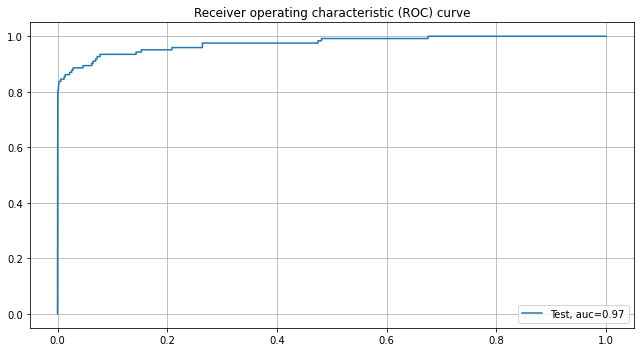

In [84]:
#call the user defined function to observe all the relevant metrics
lr_metrics3 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

4. Store metrics in a dataframe to analyse later

In [85]:
#Store metrics in a table
metric_series = pd.Series(lr_metrics3, name = 'LR with ROS')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS
Metric,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057


### Model 2: Decision Tree Classifier

1. Let's start by defining the hyperparameters for gridsearch and creating a gridsearch object

In [86]:
# Decision Tree - the class weight is used to handle class imbalance - 
#it adjusts the cost function without modifying the data. Hence the underlying data is still imbalanced
dtree = DecisionTreeClassifier()

# hyperparameter space
params = {"criterion": ["gini", "entropy"], "max_depth": [2,3,4], "min_samples_leaf": [5,6,7]}

# Create 5 folds as this will allow sufficient(100) number of 1's in each batch of the k-fold
# Using StratifiedKFold will ensure that minority calss is distributed equally thereby facilitating the model to learn better
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
dt_model3 = GridSearchCV(dtree, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of Decision Tree, hence a Decision Tree model will be built and trained on X_train

In [87]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with decision tree as estimator
dt_model3.fit(X_train_ros, y_train_ros)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(dt_model3.best_score_,2))
print("Best hyperparameters: ", dt_model3.best_params_)

Start: 2022-01-24 20:59:02.552123
Fitting 5 folds for each of 18 candidates, totalling 90 fits
End: 2022-01-24 21:00:31.490444

Best AUC:  0.98
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7}


3. Making predictions using the model built on the test data

In [88]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = dt_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = dt_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:00:31.498456
End: 2022-01-24 21:00:31.524450


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.85      0.07       123

    accuracy                           0.96     71202
   macro avg       0.52      0.91      0.53     71202
weighted avg       1.00      0.96      0.98     71202

Confusion Matrix:
[[68456  2623]
 [   18   105]]

AUC Score:  0.92
F1 Score:  0.074
Accuracy: 0.963
Recall/Sensitivity:  0.854
Precision:  0.038
ROC for the test dataset 92.0%


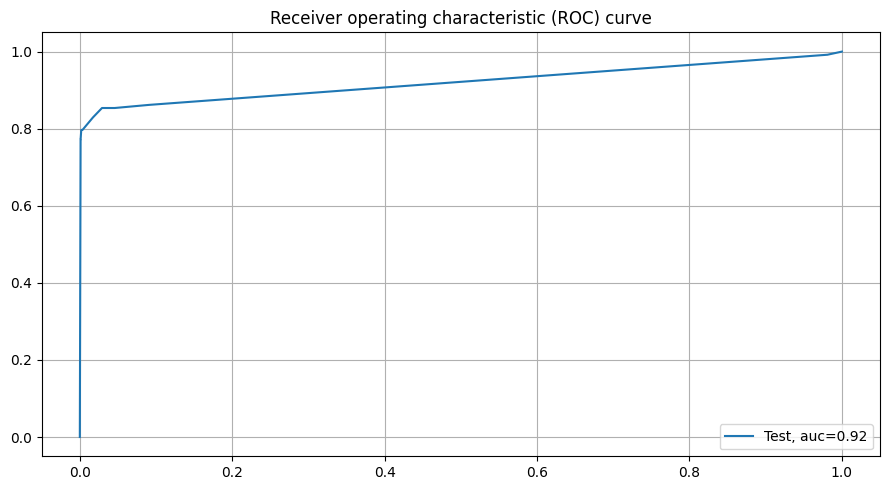

In [89]:
#call the user defined function to observe all the relevant metrics
dt_metrics3 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [90]:
#Store metrics in a table
metric_series = pd.Series(dt_metrics3, name = 'DT with ROS')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS
Metric,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038


### Model 3: Random Forest Classifier

1. Let's use already tuned hyperparameters and build a random forest classifier

In [91]:
#Declare params
params = {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 100}
# {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 110}

#create random forest object using the params
rf_model3 = RandomForestClassifier(**params)

print('Start:',dt.datetime.now())

#Fit the model to train dataset
rf_model3.fit(X_train_ros, y_train_ros)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:00:31.895875
End: 2022-01-24 21:02:47.699060


2. Making predictions using the model built on the test data

In [92]:
print('Start:',dt.datetime.now())

#predict the probabilty of class using the built model
y_test_pred_proba = rf_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = rf_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:02:47.711062
End: 2022-01-24 21:02:48.847145


3. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.83      0.79       123

    accuracy                           1.00     71202
   macro avg       0.88      0.91      0.90     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71047    32]
 [   21   102]]

AUC Score:  0.973
F1 Score:  0.794
Accuracy: 0.999
Recall/Sensitivity:  0.829
Precision:  0.761
ROC for the test dataset 97.0%


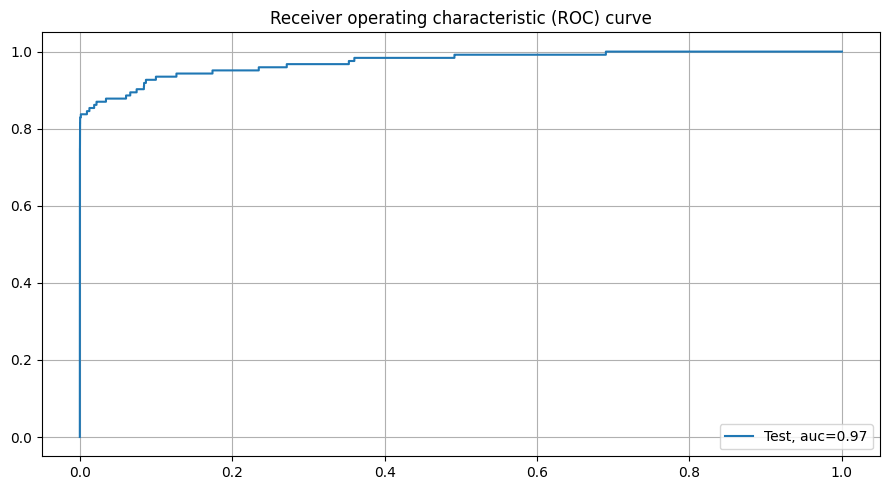

In [93]:
#call the user defined function to observe all the relevant metrics
rf_metrics3 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

4. Store metrics in a dataframe to analyse later

In [94]:
#Store metrics in a table
metric_series = pd.Series(rf_metrics3, name = 'RF with ROS')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS
Metric,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761


### Model 4: XGBoost Classifier

1. Let's use already tuned hyperparameters and build a random forest classifier

In [95]:
#Declare params
params = {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 120, 'objective': 'binary:logistic', 'subsample': 0.9}
#{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 180, 'objective': 'binary:logistic', 'subsample': 0.6}

#create xgboost object using the params
xgb_model3 = XGBClassifier(**params)

print('Start:',dt.datetime.now())

#Fit the model to train dataset
xgb_model3.fit(X_train_ros, y_train_ros)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:02:49.242374
[21:02:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
End: 2022-01-24 21:03:44.032994


2. Making predictions using the model built on the test data

In [96]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = xgb_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = xgb_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:03:44.042995
End: 2022-01-24 21:03:44.235010


3. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71070     9]
 [   24    99]]

AUC Score:  0.972
F1 Score:  0.857
Accuracy: 1.0
Recall/Sensitivity:  0.805
Precision:  0.917
ROC for the test dataset 97.0%


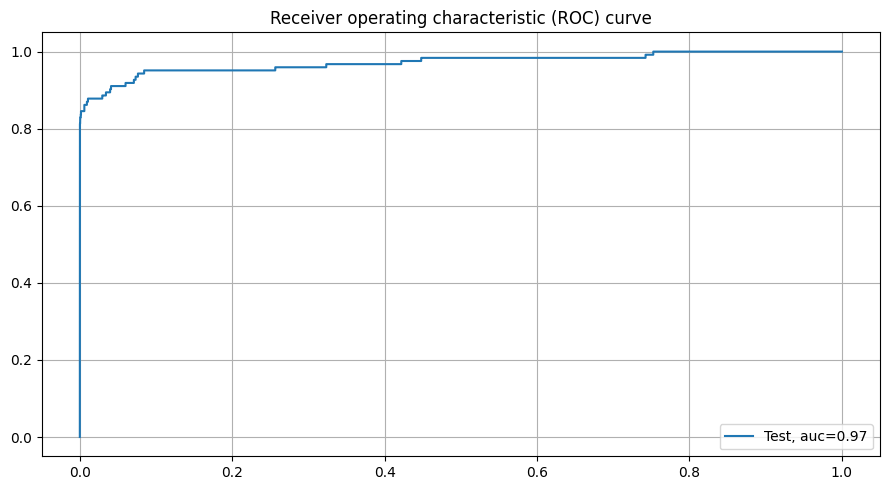

In [97]:
#call the user defined function to observe all the relevant metrics
xgb_metrics3 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

4. Store metrics in a dataframe to analyse later

In [98]:
#Store metrics in a table
metric_series = pd.Series(xgb_metrics3, name = 'XGB with ROS')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS
Metric,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917


### 2. Synthetic Minority Over-Sampling Technique (SMOTE)

In this process, you can generate new data points that lie vectorially between two data points that belong to the minority class. These data points are randomly chosen and then assigned to the minority class. This method uses the K-nearest neighbours to create random synthetic samples.

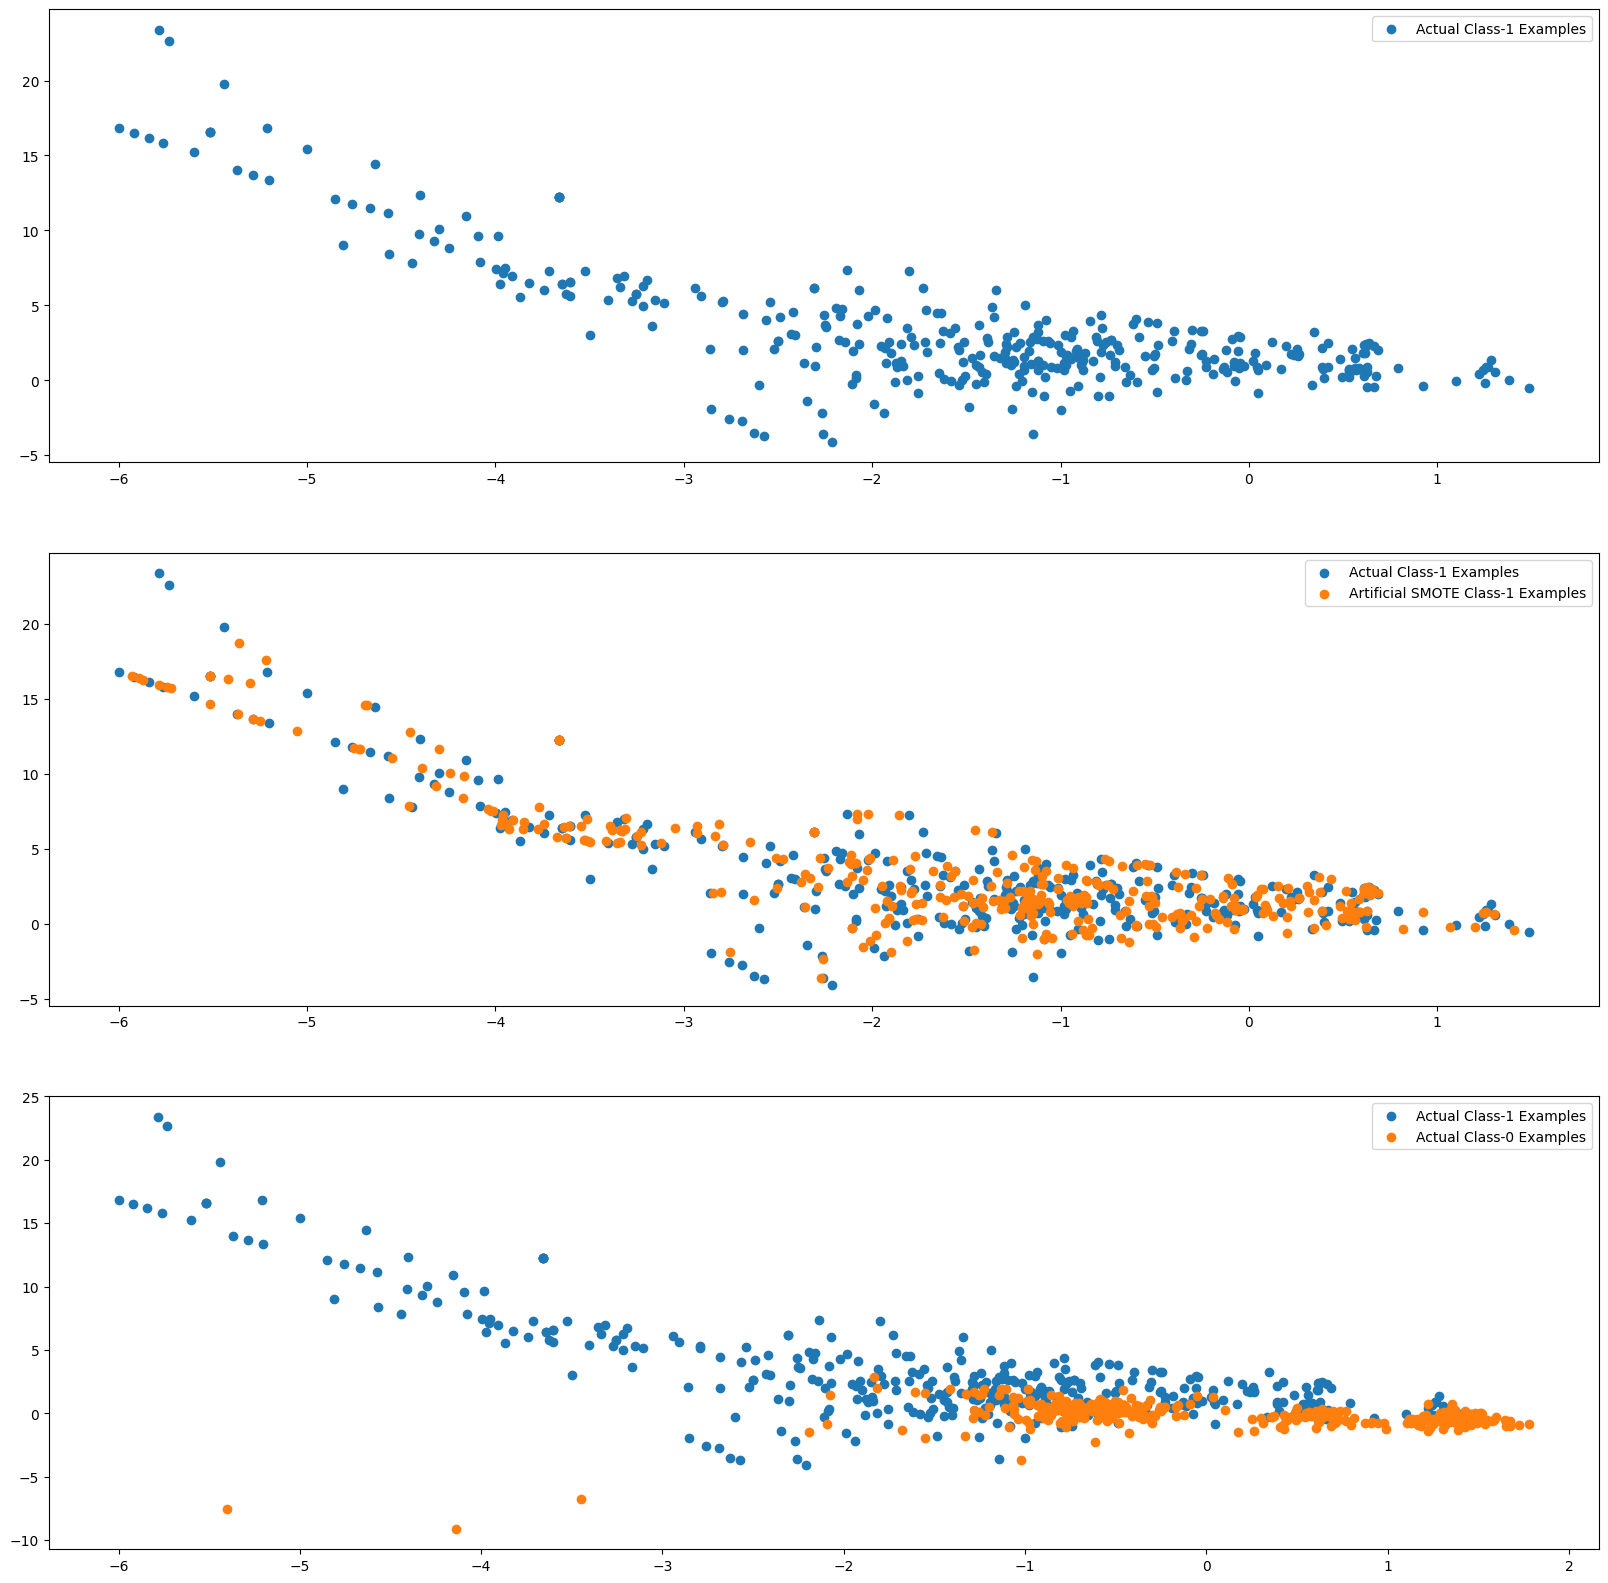

In [99]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Model 1: Logistic Regression

1. Let's use the lr_model3 developped previously

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of logistic regression, hence a logistic regression model will be built and trained on X_train

In [100]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with logistic regression as estimator
lr_model3.fit(X_train_smote, y_train_smote)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(lr_model3.best_score_,2))
print("Best hyperparameters: ", lr_model3.best_params_)

Start: 2022-01-24 21:03:45.760006
Fitting 5 folds for each of 24 candidates, totalling 120 fits
End: 2022-01-24 21:04:57.830526

Best AUC:  0.99
Best hyperparameters:  {'C': 1000, 'penalty': 'l2'}


3. Making predictions using the model built on the test data

In [101]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = lr_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = lr_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:04:57.850527
End: 2022-01-24 21:04:57.866530


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     71079
           1       0.06      0.88      0.11       123

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202

Confusion Matrix:
[[69269  1810]
 [   15   108]]

AUC Score:  0.972
F1 Score:  0.106
Accuracy: 0.974
Recall/Sensitivity:  0.878
Precision:  0.056
ROC for the test dataset 97.0%


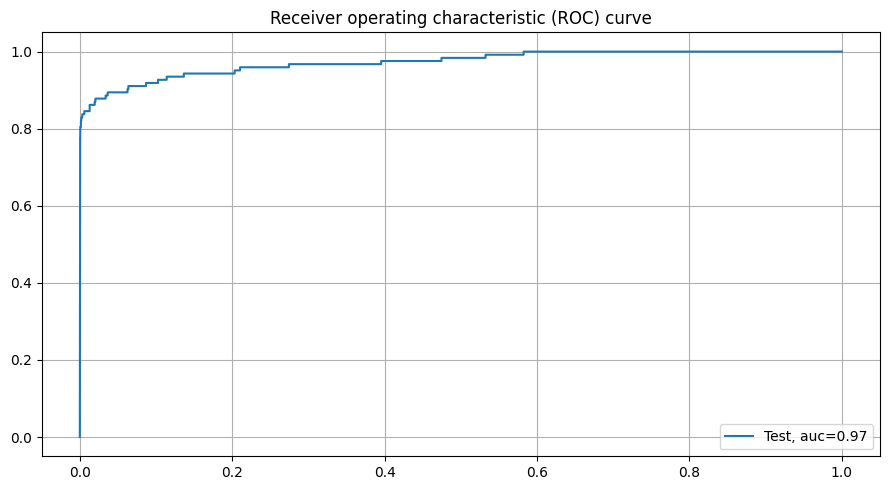

In [102]:
#call the user defined function to observe all the relevant metrics
lr_metrics4 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [103]:
#Store metrics in a table
metric_series = pd.Series(lr_metrics4, name = 'LR with SMOTE')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS,LR with SMOTE
Metric,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972,0.972
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857,0.106
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000,0.974
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805,0.878
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917,0.056


### Model 2: Decision Tree Classifier

1. Let's use the dt_model3 developped previously

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of Decision Tree, hence a Decision Tree model will be built and trained on X_train

In [104]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with decision tree as estimator
dt_model3.fit(X_train_smote, y_train_smote)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(dt_model3.best_score_,2))
print("Best hyperparameters: ", dt_model3.best_params_)

Start: 2022-01-24 21:04:58.328568
Fitting 5 folds for each of 18 candidates, totalling 90 fits
End: 2022-01-24 21:07:23.359434

Best AUC:  0.98
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}


3. Making predictions using the model built on the test data

In [105]:
print('Start:',dt.datetime.now())

#predict the probabilty of class using the built model
y_test_pred_proba = dt_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = dt_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:07:23.372437
End: 2022-01-24 21:07:23.403439


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.12      0.82      0.22       123

    accuracy                           0.99     71202
   macro avg       0.56      0.91      0.61     71202
weighted avg       1.00      0.99      0.99     71202

Confusion Matrix:
[[70367   712]
 [   22   101]]

AUC Score:  0.936
F1 Score:  0.216
Accuracy: 0.99
Recall/Sensitivity:  0.821
Precision:  0.124
ROC for the test dataset 94.0%


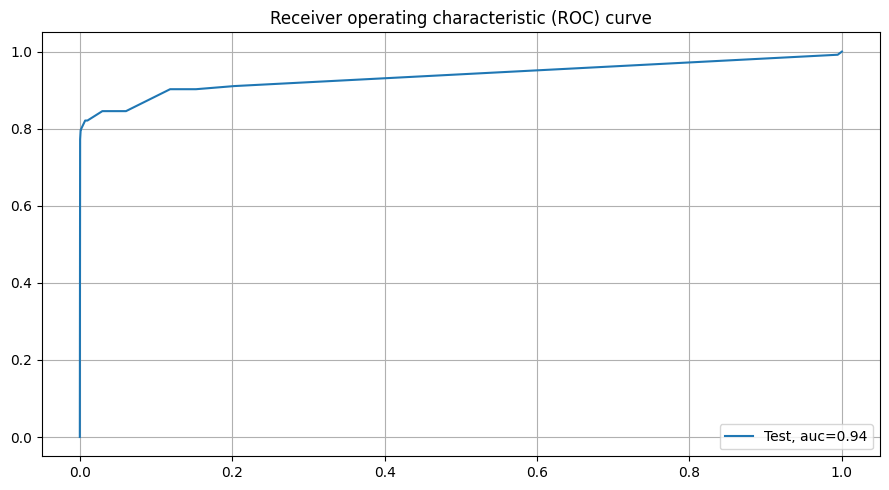

In [106]:
#call the user defined function to observe all the relevant metrics
dt_metrics4 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [107]:
#Store metrics in a table
metric_series = pd.Series(dt_metrics4, name = 'DT with SMOTE')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS,LR with SMOTE,DT with SMOTE
Metric,,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972,0.972,0.936
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857,0.106,0.216
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000,0.974,0.990
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805,0.878,0.821
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917,0.056,0.124


### Model 3: Random Forest Classifier

1. Let's use the rf_model3 developped previously

2. Build Model: Fit the model on Smote Dataset

In [108]:
print('Start:',dt.datetime.now())

# fit random forest model on smote dataset
rf_model3.fit(X_train_smote, y_train_smote)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:07:23.803472
End: 2022-01-24 21:10:49.608925


3. Making predictions using the model built on the test data

In [109]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = rf_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = rf_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:10:49.639927
End: 2022-01-24 21:10:50.967026


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.46      0.83      0.59       123

    accuracy                           1.00     71202
   macro avg       0.73      0.91      0.79     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[70957   122]
 [   21   102]]

AUC Score:  0.979
F1 Score:  0.588
Accuracy: 0.998
Recall/Sensitivity:  0.829
Precision:  0.455
ROC for the test dataset 98.0%


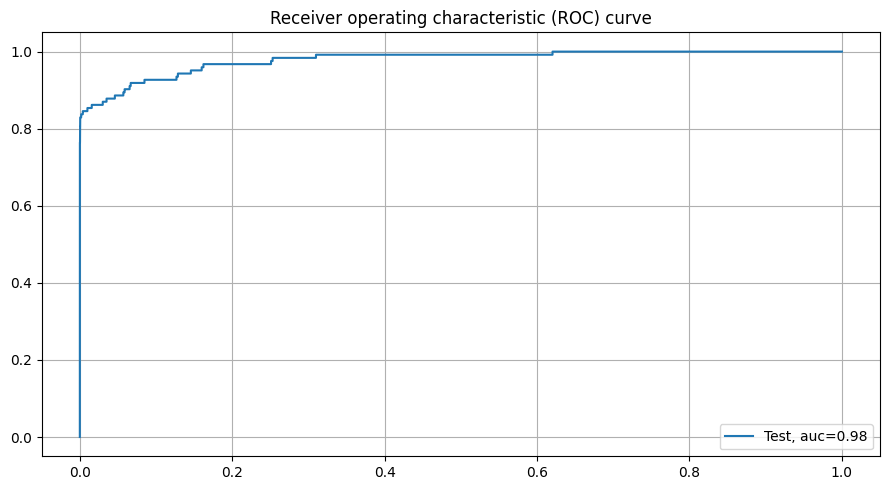

In [110]:
#call the user defined function to observe all the relevant metrics
rf_metrics4 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [111]:
#Store metrics in a table
metric_series = pd.Series(rf_metrics4, name = 'RF with SMOTE')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS,LR with SMOTE,DT with SMOTE,RF with SMOTE
Metric,,,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972,0.972,0.936,0.979
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857,0.106,0.216,0.588
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000,0.974,0.990,0.998
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805,0.878,0.821,0.829
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917,0.056,0.124,0.455


### Model 4: XGBoost Classifier

1. Let's use xgb_model3 developped previously

2. Build Model: Fit model for Smote dataset

In [112]:
print('Start:',dt.datetime.now())

# Fit model for Smote dataset
xgb_model3.fit(X_train_smote, y_train_smote)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:10:51.945740
[21:10:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
End: 2022-01-24 21:12:15.582565


3. Making predictions using the model built on the test data

In [113]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = xgb_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = xgb_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:12:15.603569
End: 2022-01-24 21:12:15.784581


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.82      0.79       123

    accuracy                           1.00     71202
   macro avg       0.88      0.91      0.89     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71047    32]
 [   22   101]]

AUC Score:  0.971
F1 Score:  0.789
Accuracy: 0.999
Recall/Sensitivity:  0.821
Precision:  0.759
ROC for the test dataset 97.0%


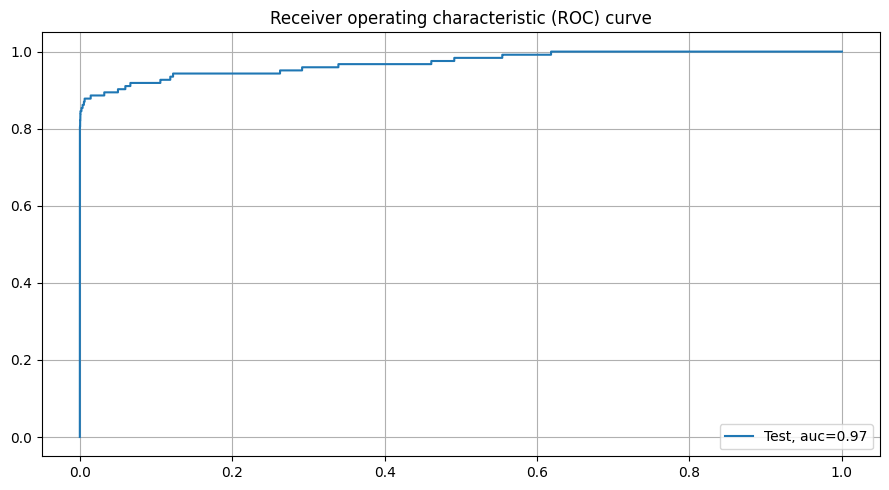

In [114]:
#call the user defined function to observe all the relevant metrics
xgb_metrics4 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [115]:
#Store metrics in a table
metric_series = pd.Series(xgb_metrics4, name = 'XGB with SMOTE')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS,LR with SMOTE,DT with SMOTE,RF with SMOTE,XGB with SMOTE
Metric,,,,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972,0.972,0.936,0.979,0.971
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857,0.106,0.216,0.588,0.789
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000,0.974,0.990,0.998,0.999
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805,0.878,0.821,0.829,0.821
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917,0.056,0.124,0.455,0.759


### 3. ADAptive SYNthetic (ADASYN)

This is similar to SMOTE, with a minor change in the generation of synthetic sample points for minority data points. For a particular data point, the number of synthetic samples that it will add will have a density distribution, whereas for SMOTE, the distribution will be uniform. The aim here is to create synthetic data for minority examples that are harder to learn rather than easier ones. 

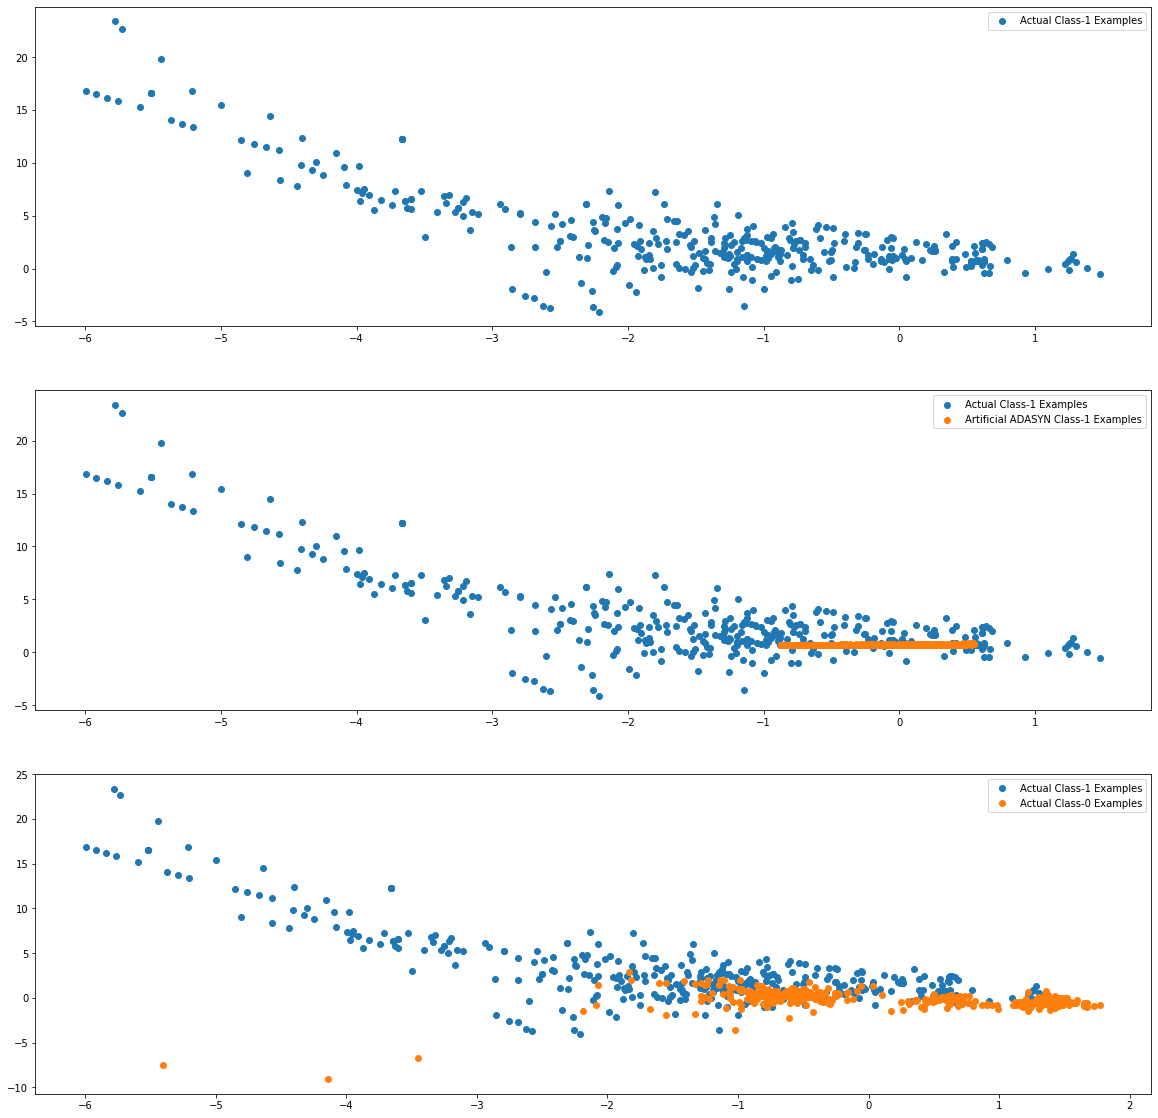

In [116]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
from imblearn.over_sampling import ADASYN

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Model 1: Logistic Regression

1. Let's use the lr_model3 developped previously

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of logistic regression, hence a logistic regression model will be built and trained on X_train

In [117]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with logistic regression as estimator
lr_model3.fit(X_train_adasyn, y_train_adasyn)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(lr_model3.best_score_,2))
print("Best hyperparameters: ", lr_model3.best_params_)

Start: 2022-01-24 21:12:18.855307
Fitting 5 folds for each of 24 candidates, totalling 120 fits
End: 2022-01-24 21:13:32.858234

Best AUC:  0.97
Best hyperparameters:  {'C': 1000, 'penalty': 'l2'}


3. Making predictions using the model built on the test data

In [118]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = lr_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = lr_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:13:32.880240
End: 2022-01-24 21:13:32.897241


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.96     71079
           1       0.02      0.91      0.04       123

    accuracy                           0.91     71202
   macro avg       0.51      0.91      0.50     71202
weighted avg       1.00      0.91      0.95     71202

Confusion Matrix:
[[65019  6060]
 [   11   112]]

AUC Score:  0.972
F1 Score:  0.036
Accuracy: 0.915
Recall/Sensitivity:  0.911
Precision:  0.018
ROC for the test dataset 97.0%


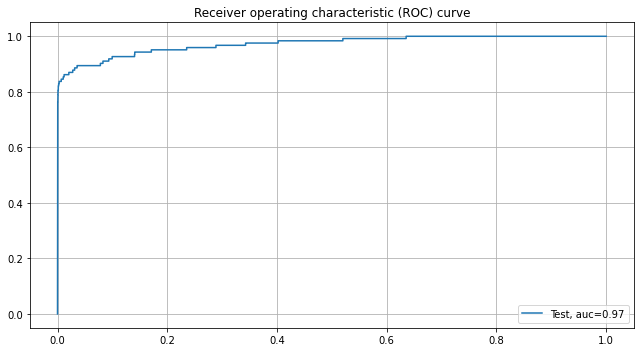

In [119]:
#call the user defined function to observe all the relevant metrics
lr_metrics5 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [120]:
#Store metrics in a table
metric_series = pd.Series(lr_metrics5, name = 'LR with ADASYN')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS,LR with SMOTE,DT with SMOTE,RF with SMOTE,XGB with SMOTE,LR with ADASYN
Metric,,,,,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972,0.972,0.936,0.979,0.971,0.972
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857,0.106,0.216,0.588,0.789,0.036
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000,0.974,0.990,0.998,0.999,0.915
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805,0.878,0.821,0.829,0.821,0.911
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917,0.056,0.124,0.455,0.759,0.018


### Model 2: Decision Tree Classifier

1. Let's use the dt_model3 developped previously

2. Build Model: Perform hyperparameter tuning by fitting the gridsearch object on train data. The estimator used is an object of Decision Tree, hence a Decision Tree model will be built and trained on X_train

In [121]:
print('Start:',dt.datetime.now())

# fit the instantiated gridsearchcv object with decision tree as estimator
dt_model3.fit(X_train_adasyn, y_train_adasyn)

print('End:',dt.datetime.now())

# print best hyperparameters
print("\nBest AUC: ", round(dt_model3.best_score_,2))
print("Best hyperparameters: ", dt_model3.best_params_)

Start: 2022-01-24 21:13:33.310268
Fitting 5 folds for each of 18 candidates, totalling 90 fits
End: 2022-01-24 21:15:48.165916

Best AUC:  0.96
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}


3. Making predictions using the model built on the test data

In [122]:
#predit the probabilty of class using the built model
print(dt.datetime.now())
y_test_pred_proba = dt_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = dt_model3.predict(X_test)
print(dt.datetime.now())

2022-01-24 21:15:48.179908
2022-01-24 21:15:48.211909


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     71079
           1       0.01      0.89      0.03       123

    accuracy                           0.89     71202
   macro avg       0.51      0.89      0.49     71202
weighted avg       1.00      0.89      0.94     71202

Confusion Matrix:
[[63530  7549]
 [   14   109]]

AUC Score:  0.938
F1 Score:  0.028
Accuracy: 0.894
Recall/Sensitivity:  0.886
Precision:  0.014
ROC for the test dataset 94.0%


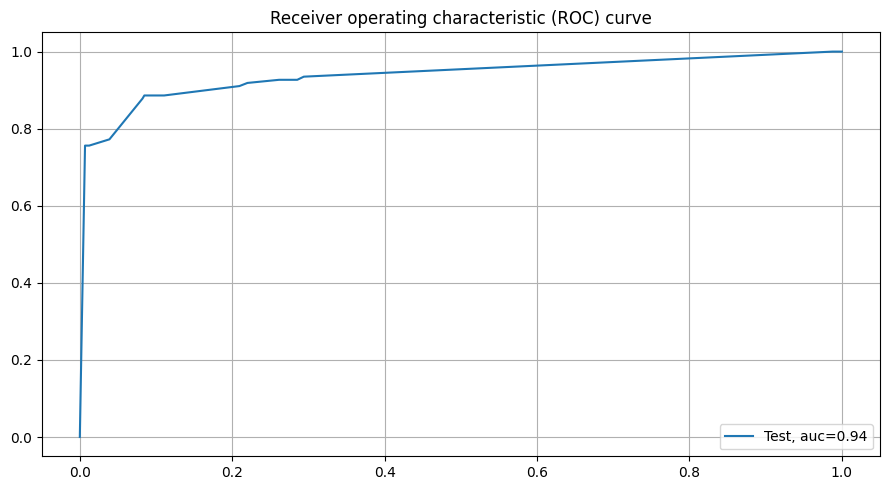

In [123]:
#call the user defined function to observe all the relevant metrics
dt_metrics5 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [124]:
#Store metrics in a table
metric_series = pd.Series(dt_metrics5, name = 'DT with ADASYN')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS,LR with SMOTE,DT with SMOTE,RF with SMOTE,XGB with SMOTE,LR with ADASYN,DT with ADASYN
Metric,,,,,,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972,0.972,0.936,0.979,0.971,0.972,0.938
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857,0.106,0.216,0.588,0.789,0.036,0.028
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000,0.974,0.990,0.998,0.999,0.915,0.894
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805,0.878,0.821,0.829,0.821,0.911,0.886
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917,0.056,0.124,0.455,0.759,0.018,0.014


### Model 3: Random Forest Classifier

1. Let's use the rf_model3 developped previously

2. Build Model: Fit model to ADASYN data

In [125]:
print('Start:',dt.datetime.now())

# Fit model to ADASYN data
rf_model3.fit(X_train_adasyn, y_train_adasyn)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:15:48.562467
End: 2022-01-24 21:19:01.608153


3. Making predictions using the model built on the test data

In [126]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = rf_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = rf_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:19:01.616153
End: 2022-01-24 21:19:02.981761


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.08      0.85      0.15       123

    accuracy                           0.98     71202
   macro avg       0.54      0.92      0.57     71202
weighted avg       1.00      0.98      0.99     71202

Confusion Matrix:
[[69948  1131]
 [   18   105]]

AUC Score:  0.979
F1 Score:  0.155
Accuracy: 0.984
Recall/Sensitivity:  0.854
Precision:  0.085
ROC for the test dataset 98.0%


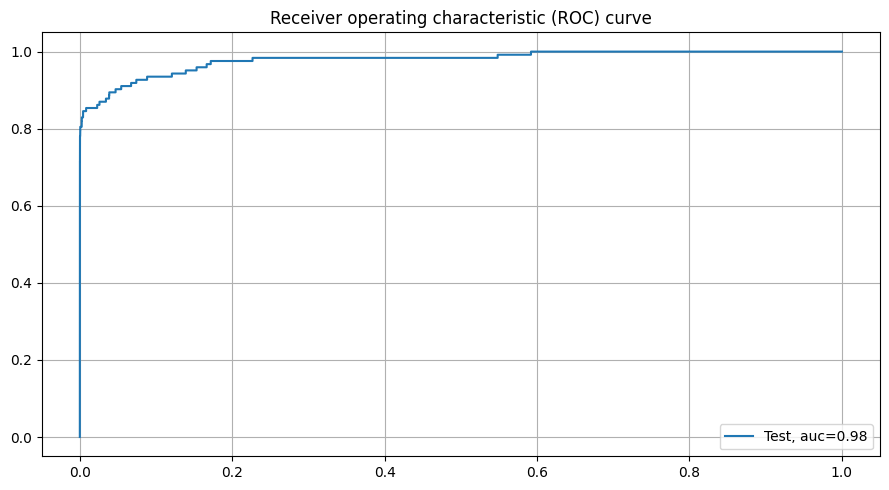

In [127]:
#call the user defined function to observe all the relevant metrics
rf_metrics5 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [128]:
#Store metrics in a table
metric_series = pd.Series(rf_metrics5, name = 'RF with ADASYN')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS,LR with SMOTE,DT with SMOTE,RF with SMOTE,XGB with SMOTE,LR with ADASYN,DT with ADASYN,RF with ADASYN
Metric,,,,,,,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972,0.972,0.936,0.979,0.971,0.972,0.938,0.979
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857,0.106,0.216,0.588,0.789,0.036,0.028,0.155
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000,0.974,0.990,0.998,0.999,0.915,0.894,0.984
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805,0.878,0.821,0.829,0.821,0.911,0.886,0.854
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917,0.056,0.124,0.455,0.759,0.018,0.014,0.085


### Model 4: XGBoost Classifier

1. Let's use xgb_model3 developped previously

2. Build Model: Fit model to ADASYN data

In [129]:
print('Start:',dt.datetime.now())

# Fit model to ADASYN data
xgb_model3.fit(X_train_adasyn, y_train_adasyn)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:19:03.444792
[21:19:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
End: 2022-01-24 21:20:25.903496


3. Making predictions using the model built on the test data

In [130]:
print('Start:',dt.datetime.now())

#predit the probabilty of class using the built model
y_test_pred_proba = xgb_model3.predict_proba(X_test)

#predict the class using the built model
y_test_pred = xgb_model3.predict(X_test)

print('End:',dt.datetime.now())

Start: 2022-01-24 21:20:25.920499
End: 2022-01-24 21:20:26.110510


4. Observe the metrics for validation with other models being built

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      0.80      0.77       123

    accuracy                           1.00     71202
   macro avg       0.87      0.90      0.89     71202
weighted avg       1.00      1.00      1.00     71202

Confusion Matrix:
[[71044    35]
 [   24    99]]

AUC Score:  0.971
F1 Score:  0.77
Accuracy: 0.999
Recall/Sensitivity:  0.805
Precision:  0.739
ROC for the test dataset 97.0%


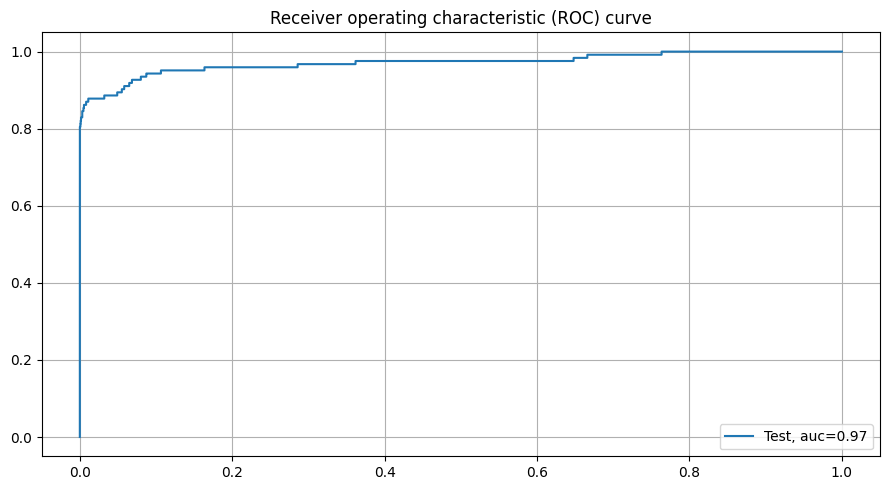

In [131]:
#call the user defined function to observe all the relevant metrics
xgb_metrics5 = GetMetrics(y_test,y_test_pred,y_test_pred_proba)

5. Store metrics in a dataframe to analyse later

In [132]:
#Store metrics in a table
metric_series = pd.Series(xgb_metrics5, name = 'XGB with ADASYN')
metric_summary = pd.concat([metric_summary, metric_series], axis = 1)
metric_summary.set_index('Metric')

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,...,RF with ROS,XGB with ROS,LR with SMOTE,DT with SMOTE,RF with SMOTE,XGB with SMOTE,LR with ADASYN,DT with ADASYN,RF with ADASYN,XGB with ADASYN
Metric,,,,,,,,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,...,0.973,0.972,0.972,0.936,0.979,0.971,0.972,0.938,0.979,0.971
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,...,0.794,0.857,0.106,0.216,0.588,0.789,0.036,0.028,0.155,0.770
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,...,0.999,1.000,0.974,0.990,0.998,0.999,0.915,0.894,0.984,0.999
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,...,0.829,0.805,0.878,0.821,0.829,0.821,0.911,0.886,0.854,0.805
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,...,0.761,0.917,0.056,0.124,0.455,0.759,0.018,0.014,0.085,0.739


## 4. Model Evaluation

Let's take a look at the metrics from all the models built till now

In [136]:
pd.set_option('display.max_columns', None)
Final_Metrics = metric_summary.set_index('Metric')
Final_Metrics

,LR w/o CV,LR with CV,KNN w/o CV,DT w/o CV,DT with CV,RF w/o CV,RF with CV,XGB w/o CV,XGB with CV,LR with ROS,DT with ROS,RF with ROS,XGB with ROS,LR with SMOTE,DT with SMOTE,RF with SMOTE,XGB with SMOTE,LR with ADASYN,DT with ADASYN,RF with ADASYN,XGB with ADASYN
Metric,,,,,,,,,,,,,,,,,,,,,
AUC Score,0.969,0.973,0.915,0.886,0.923,0.933,0.972,0.966,0.969,0.974,0.920,0.973,0.972,0.972,0.936,0.979,0.971,0.972,0.938,0.979,0.971
F1 Score,0.711,0.772,0.818,0.772,0.717,0.848,0.857,0.852,0.844,0.108,0.074,0.794,0.857,0.106,0.216,0.588,0.789,0.036,0.028,0.155,0.770
Accuracy,0.999,0.999,0.999,0.999,0.999,1.000,1.000,1.000,1.000,0.975,0.963,0.999,1.000,0.974,0.990,0.998,0.999,0.915,0.894,0.984,0.999
Sensitivity,0.610,0.797,0.748,0.772,0.813,0.772,0.780,0.772,0.772,0.870,0.854,0.829,0.805,0.878,0.821,0.829,0.821,0.911,0.886,0.854,0.805
Precision,0.852,0.748,0.902,0.772,0.641,0.941,0.950,0.950,0.931,0.057,0.038,0.761,0.917,0.056,0.124,0.455,0.759,0.018,0.014,0.085,0.739


In [137]:
pd.reset_option("max_columns")

#### Analysis:

1. Our main objective has been to predict fraudulent credit card transactions with the help of machine learning models.
2. To achieve this we have developped 21 models and the metrics for the same have been tabulated above.
3. First 9 columns represent models which were built on imbalanced data while the remaining 12 have been built on synthetic data generated using various techniques such as Random OverSampling, SMOTE and ADASYN.
4. All the above metrics are obtained on test dataset derived by splitting the original data into train and test chunks.
5. In order to meet our objective, we need to ensure that we minimize False Negatives as much as possible.
6. At the same time we also need to ensure that the amount of False Positives is aldo within a certain threshold as we don't want to unnecessarily scare everyone.
7. Precision and Recall/Sensitivity are 2 metrics which revolve around False Positives and False Negatives.
8. AUC score for almost all the models built is pretty high and good. Hence the decision factor comes down to values in 'Recall', 'Precision' and 'F1 score' fields.
9. Top 6 Models with Highest Values for Sensitivity/Recall are:
    1. Logistic Regression with ADASYN - 0.911
    2. Decision Tree with ADASYN - 0.886
    3. Logistic Regression with SMOTE - 0.878 
    4. Logistic Regression with ROS - 0.870
    5. Random Forest with ADASYN and Decision Tree with ROS - 0.854
    6. Random Forest with ROS and Random Forest with SMOTE - 0.829
    7. Decision Tree with SMOTE and XGBoost wirh SMOTE - 0.821
    8. XGBoost wirh ROS and XGBoost with ADASYN - 0.805
10. But among the above mentioned models, only the following models have good precision score as well:
    1. XGBoost with ROS - 0.917
    2. Random Forest with ROS - 0.761
    3. XGBoost with Smote - 0.759
    4. XGBoost with ADASYN - 0.739
11. Among the above 4 models, XGBoost with ROS gives the highest F1 Score and has a good AUC score as well. Hence an optimum model to proceed with would be XGBoost model by performing Random Oversampling on dataset with class imbalance.
    

## 5. Conclusion

As captured previously, xgb_model3 is the model fit to paramters which are tuned using hyperparameter tuning techniques like GridSearch Cross Validation using Stratified K-Folds.
<br>y_test_pred captures rediction for test dataset using xgb_model3

In [150]:
# Capture the prediction on Random OverSampled balanced Train dataset
y_train_pred = xgb_model3.predict(X_train_ros)

# Print Area Under Curve for Training ROS dataset
print('Training AUC =', metrics.roc_auc_score(y_train_ros, y_train_pred))
print('Testing AUC =', xgb_metrics3[0])

# Capture fpr, tpr and threshold
fpr, tpr, thresholds = metrics.roc_curve(y_train_ros, y_train_pred)
print('\nTrain Dataset:\nFalse Positive Rate:',fpr)
print('True Positive Rate:',tpr)
threshold = thresholds[np.argmax(tpr-fpr)]

# Print Threshold
print("Threshold=",threshold)

# Capture fpr, tpr and threshold
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
print('\nTest Dataset:\nFalse Positive Rate:',fpr)
print('True Positive Rate:',tpr)
threshold = thresholds[np.argmax(tpr-fpr)]

# Print Threshold
print("Threshold=",threshold)

Training AUC = 0.9999859310810557
Testing AUC = 0.972

Train Dataset:
False Positive Rate: [0.00000000e+00 2.81378379e-05 1.00000000e+00]
True Positive Rate: [0. 1. 1.]
Threshold= 1

Test Dataset:
False Positive Rate: [0.00000000e+00 4.92409854e-04 1.00000000e+00]
True Positive Rate: [0.         0.80487805 1.        ]
Threshold= 1


<b>Hence XGBoost with Random Oversampling provides the optimum result for detecing if a transaction is fraud or not</b>